In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df = pd.read_csv("amp_curves.csv")
print(df.head())
df_array = df.iloc[:,1:].to_numpy(dtype=float)
molnames = df.iloc[:,0].to_numpy(dtype=str)

       mol  A1_5   A1_10   A1_20   A1_40   A1_80  A2_5   A2_10   A2_20  \
0  1500272   NaN   11.53   28.20   40.37   64.35   NaN   13.25   29.46   
1  1501007   NaN   11.48   18.07   47.45   92.83   NaN   14.31   23.01   
2  1501150   NaN   49.44  113.83  152.94  200.30   NaN   40.09   79.97   
3  1503100   NaN  133.16  235.08  393.65  825.84   NaN  124.53  232.97   
4  1503243   NaN   92.55  168.76  301.06  652.52   NaN  106.38  200.59   

    A2_40  ...  A1_pd3pore_5  A1_pd3pore_10  A1_pd3pore_20  A1_pd3pore_40  \
0   34.31  ...           NaN          33.51          52.89          68.61   
1   62.53  ...           NaN          19.81          30.80          88.92   
2  118.30  ...           NaN          55.31          71.02         160.54   
3  412.39  ...           NaN         110.70         190.48         401.47   
4  336.07  ...           NaN         226.22         376.49         609.41   

   A1_pd3pore_80  A2_pd3pore_5  A2_pd3pore_10  A2_pd3pore_20  A2_pd3pore_40  \
0         127

In [2]:
from sklearn.linear_model import LinearRegression

def scale(val):
    # scale extreme data points
    scale_zone = (2,17) # scale values between 2 to 17
    compress_ratio = 0.5 # scale the zone into 0.5
    if val > scale_zone[1]:
        raise ValueError(f"value larger than maximum: {val} > {scale_zone[1]}")
    elif val > scale_zone[0]:
        return scale_zone[0] + 1.5 * (val-scale_zone[0])/(scale_zone[1]-scale_zone[0])
    else:
        return val


def CalcSlope(X, Y):
    X = X[~np.isnan(Y)]
    Y = Y[~np.isnan(Y)]
    X = X.reshape(-1,1)
    reg = LinearRegression(fit_intercept=False).fit(X, Y)
    return np.round(reg.coef_[0],3), np.round(reg.score(X,Y),3) # slope, r2

1500272


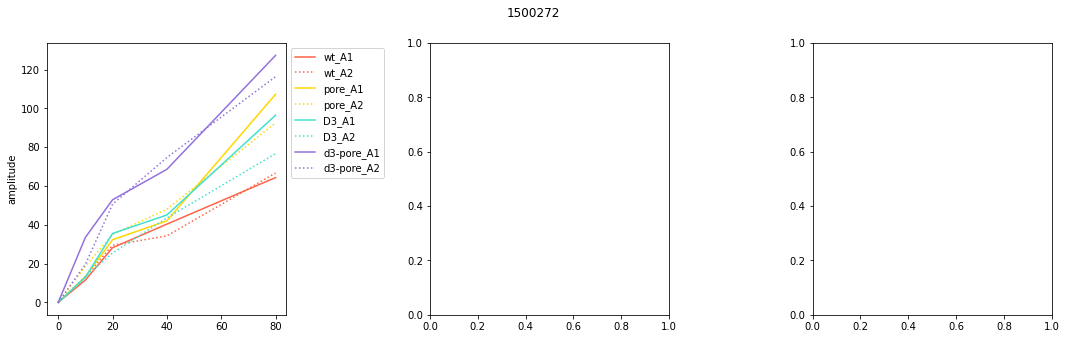

1501007


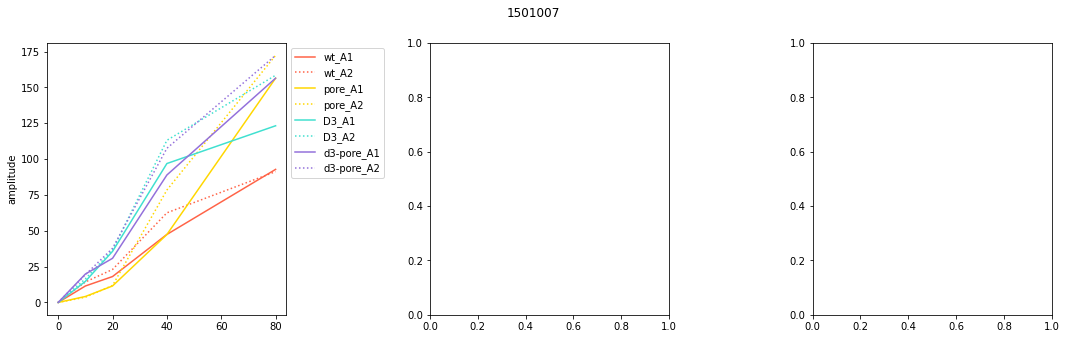

1501150


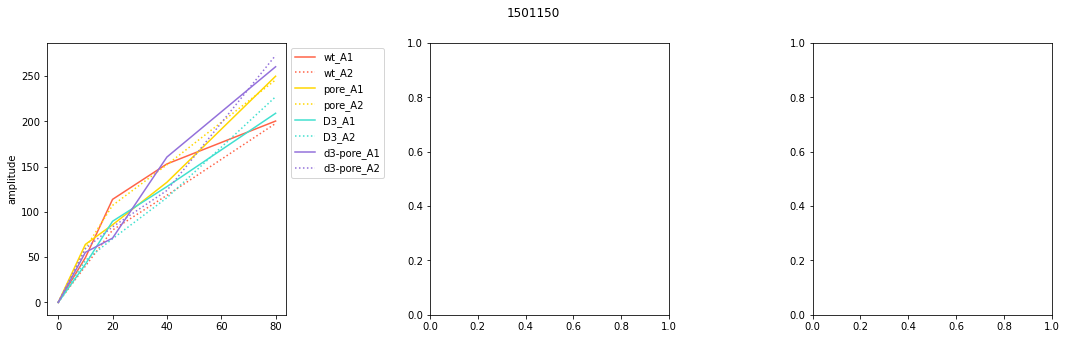

1503100


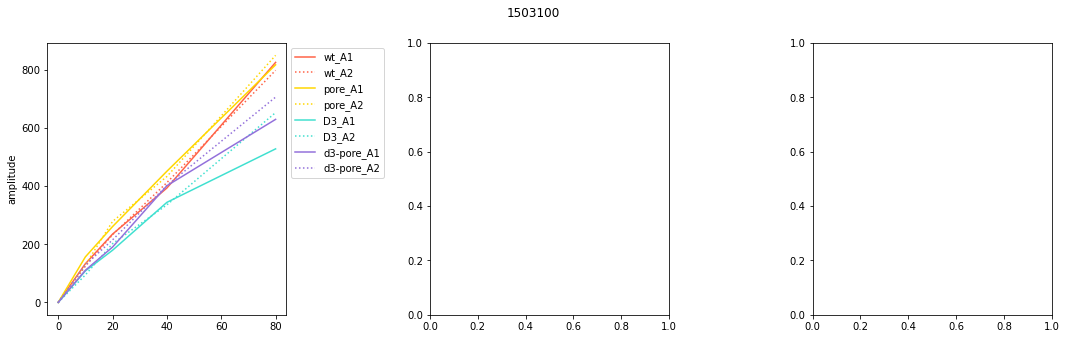

1503243


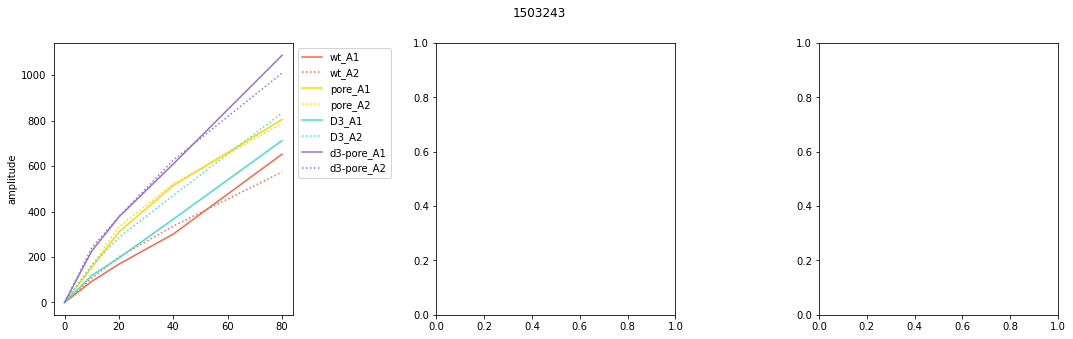

1504185


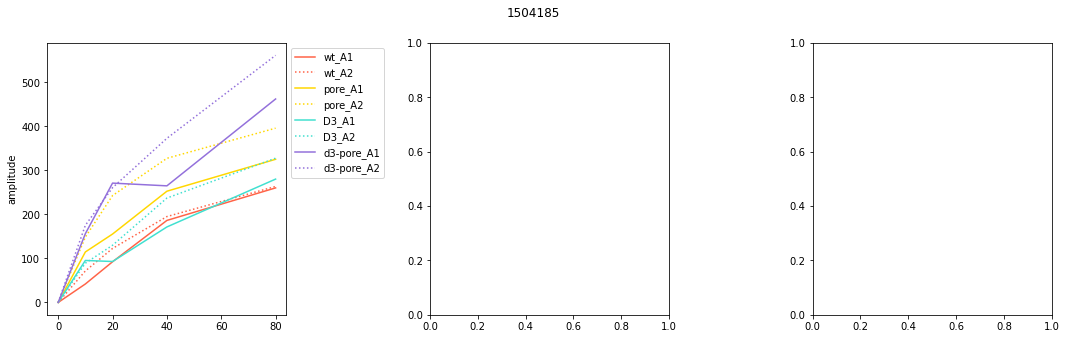

1505604


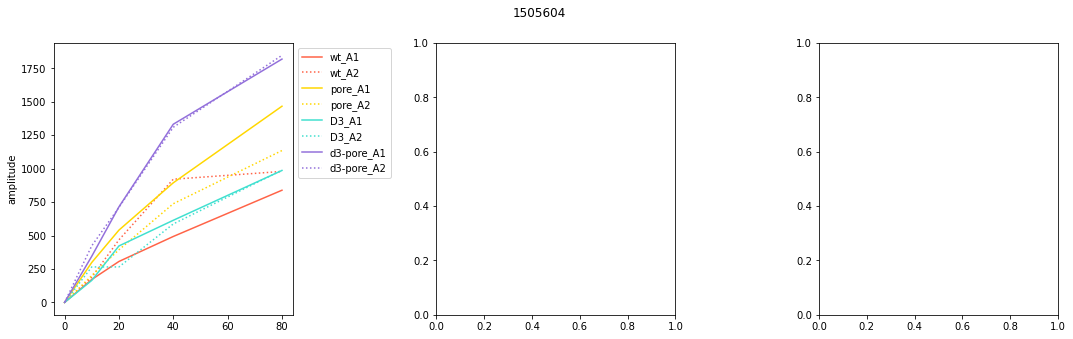

1505622


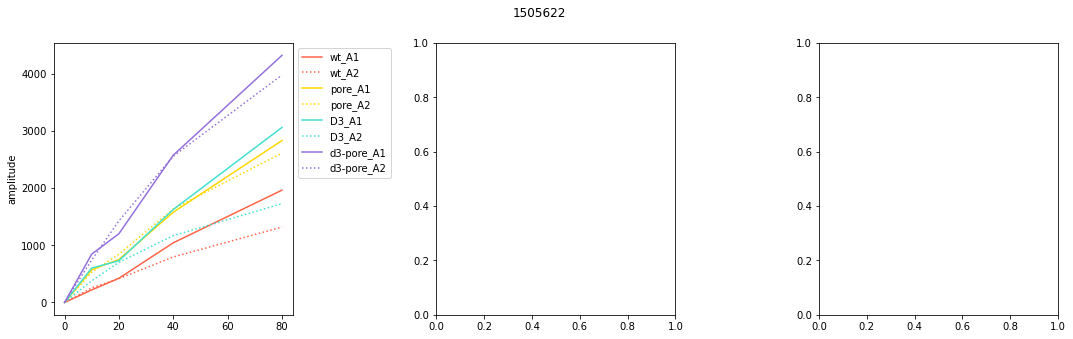

1506043


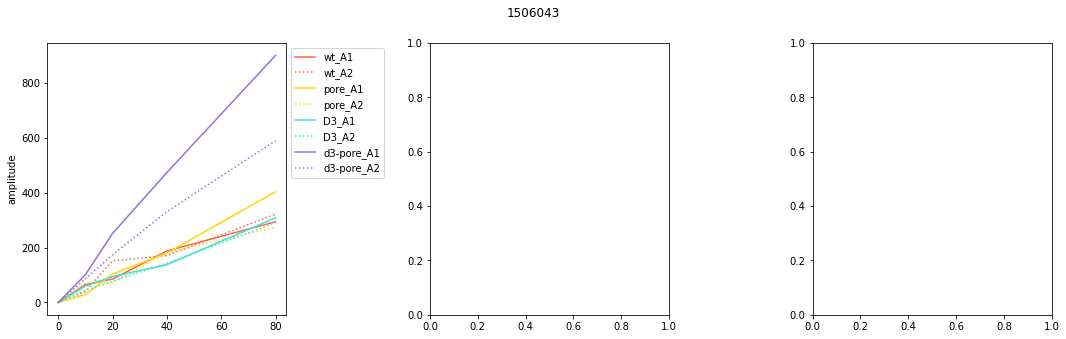

2300173


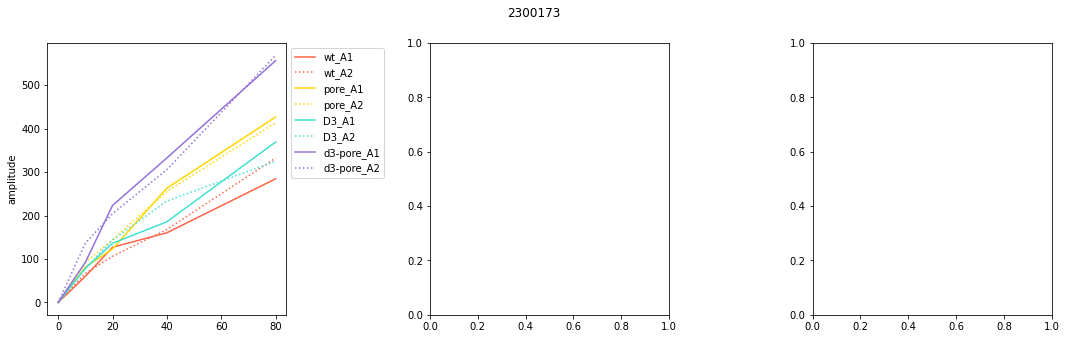

2300307


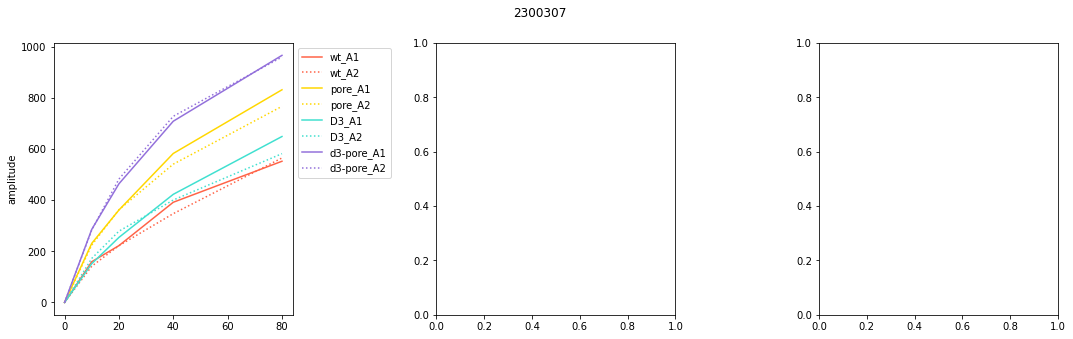

ASD001


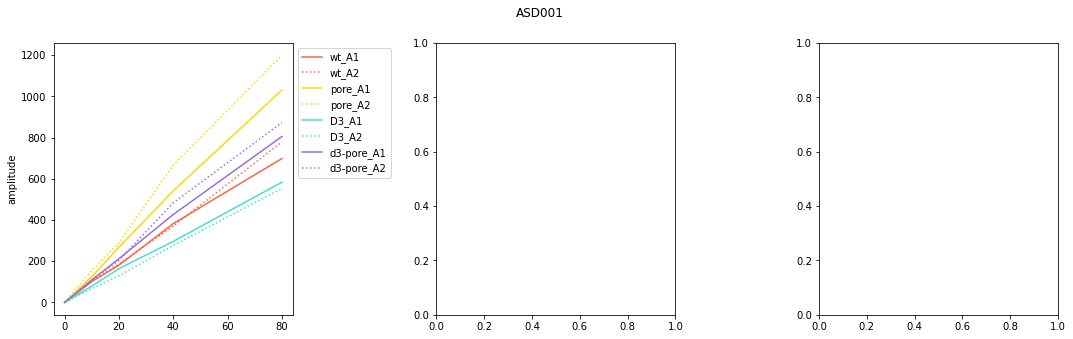

ASD002


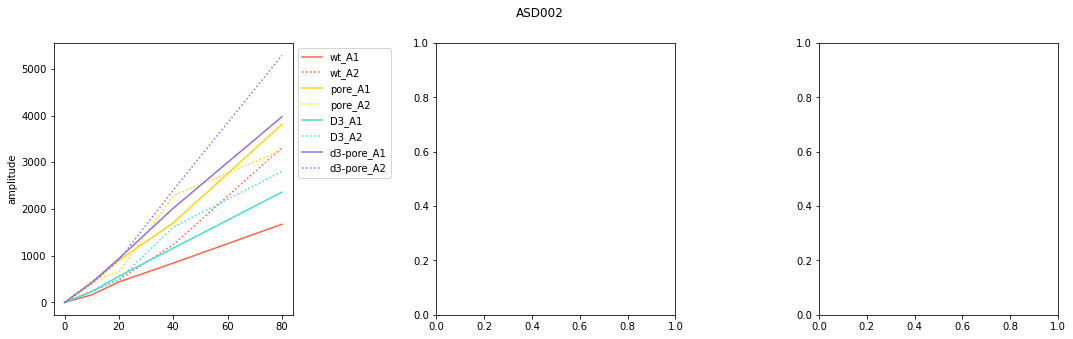

ASD004


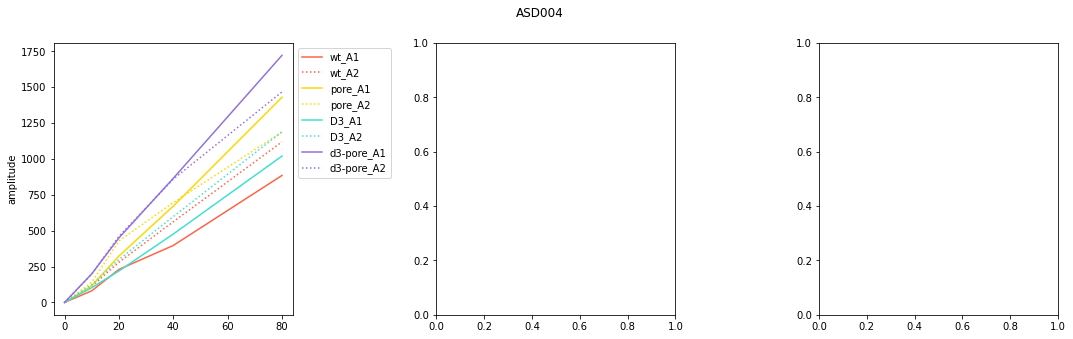

ASD007


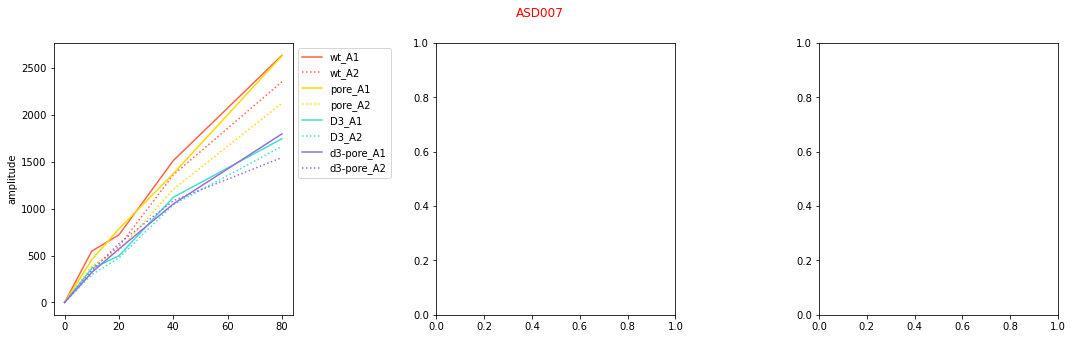

ASD012


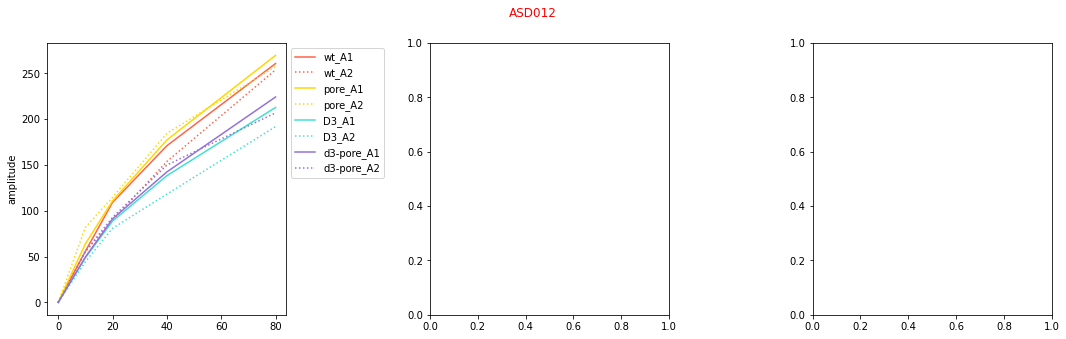

ASD019


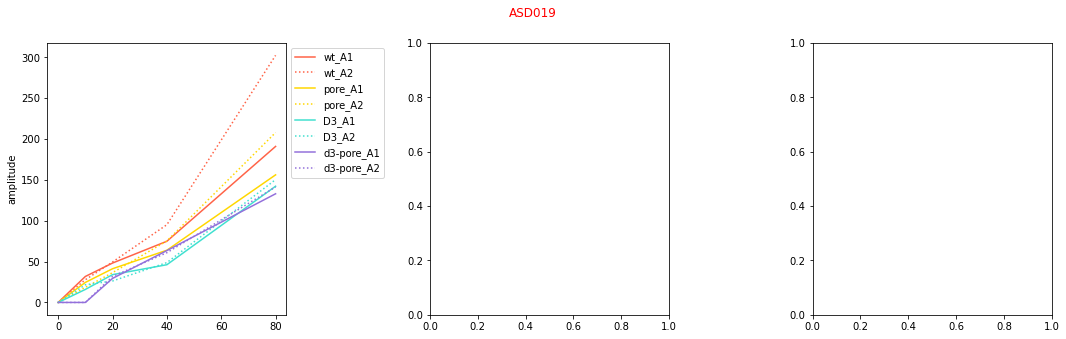

ASD021


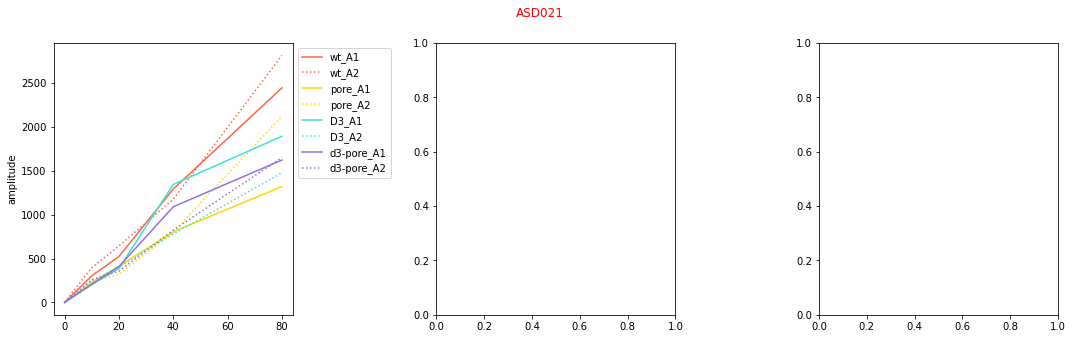

D300-0069


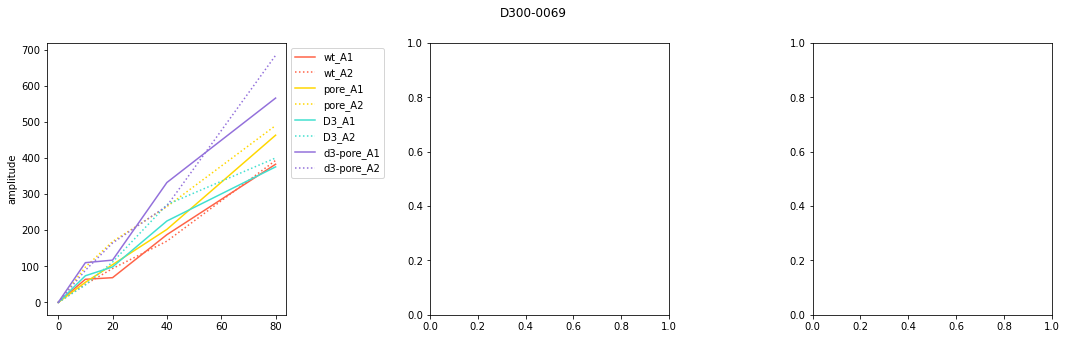

D300-0109


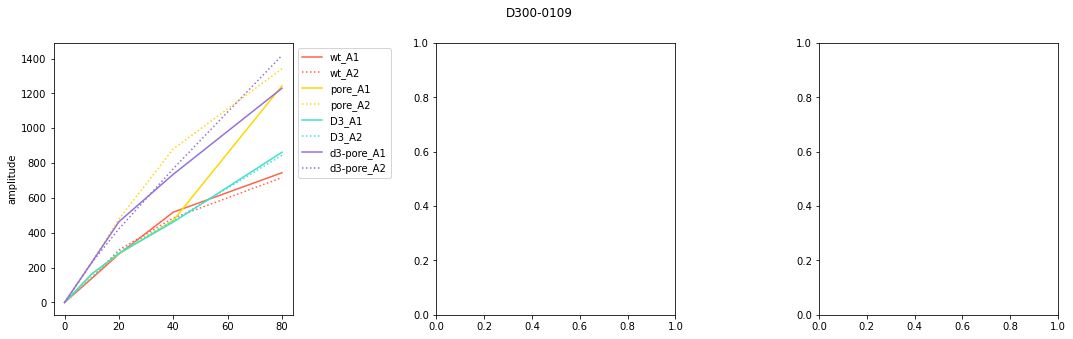

D372-0004


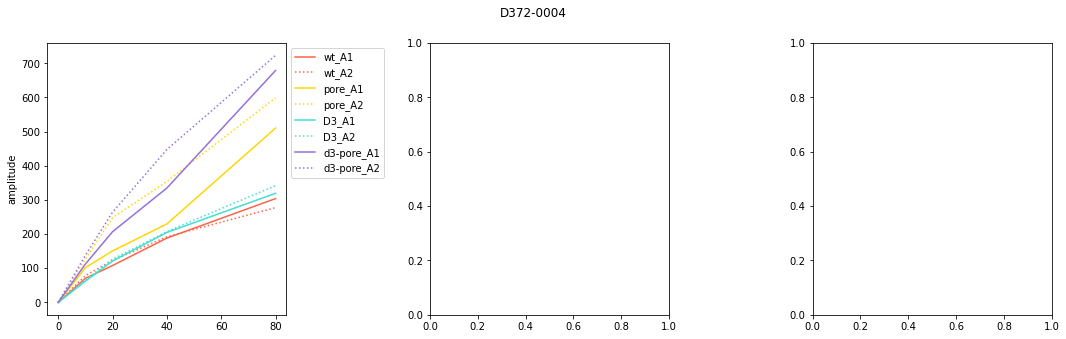

D372-0005


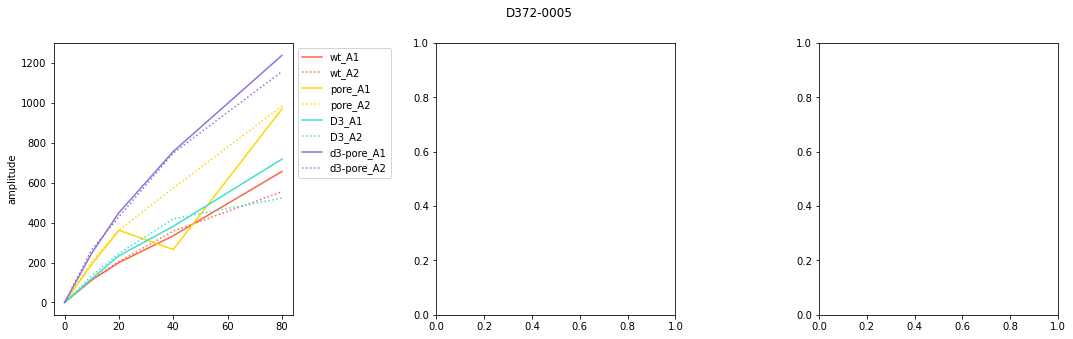

D372-0044


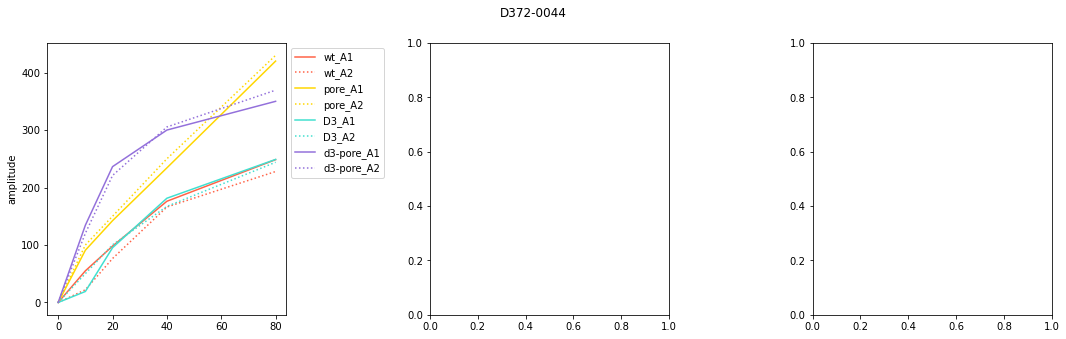

D372-0163


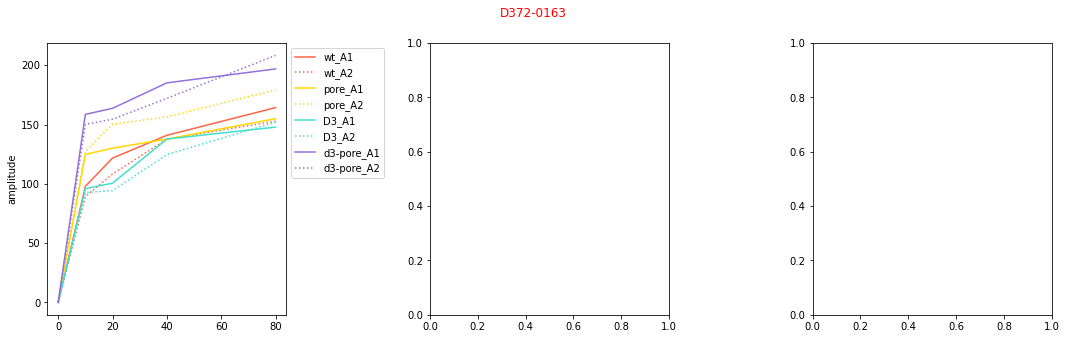

D389-0855


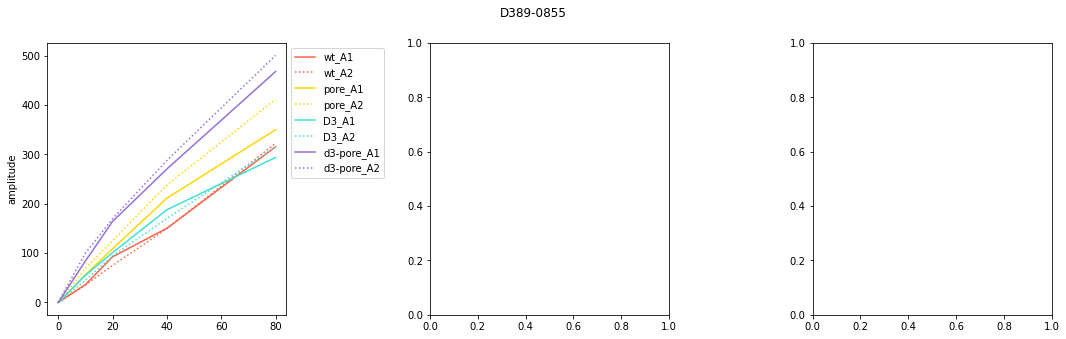

D389-0970


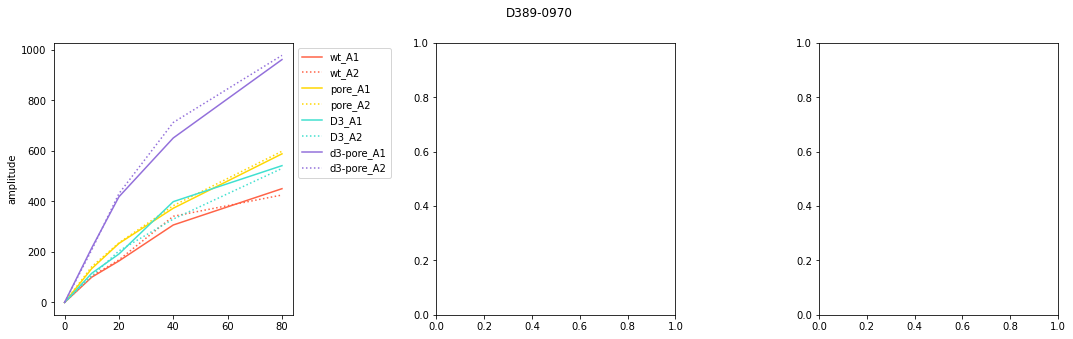

DP-0000267


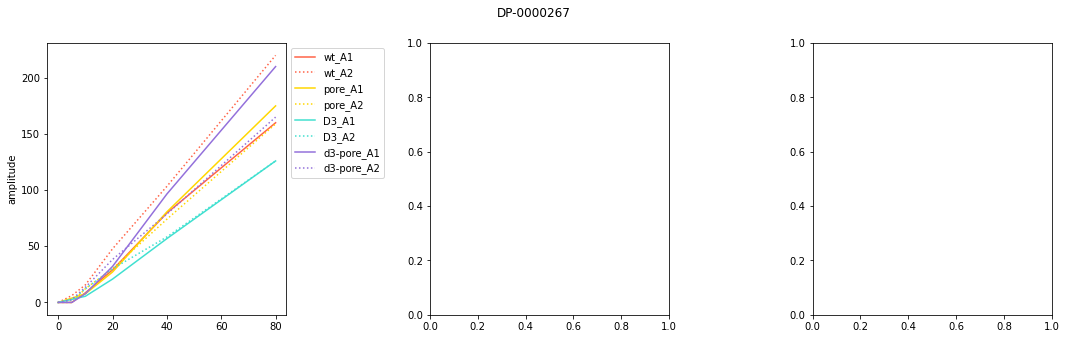

DP-0000268


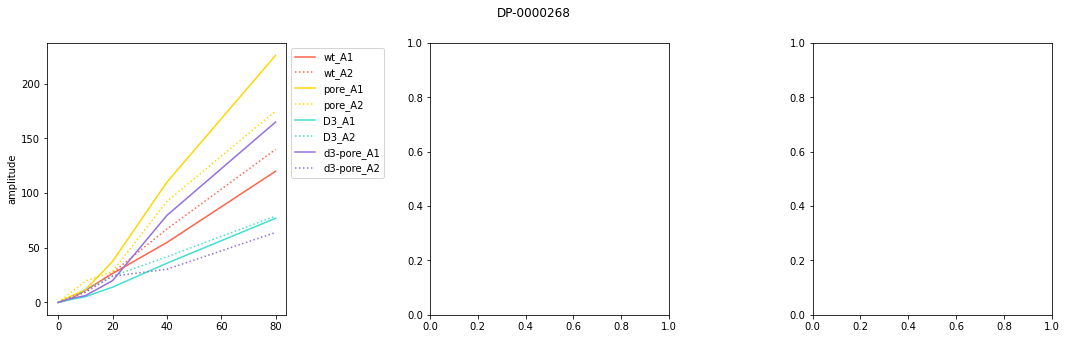

DP-0000271


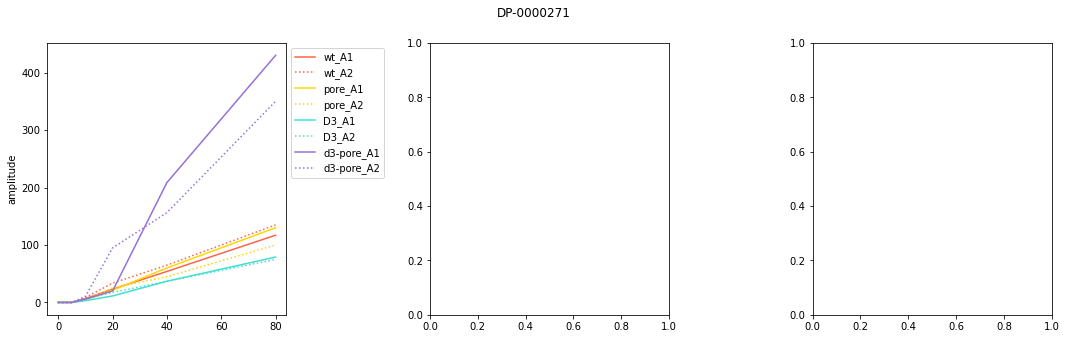

DP-0000273


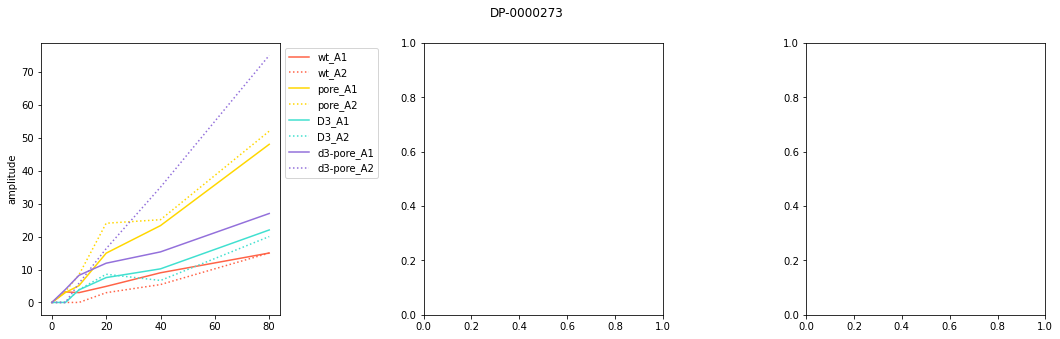

DP-0000274


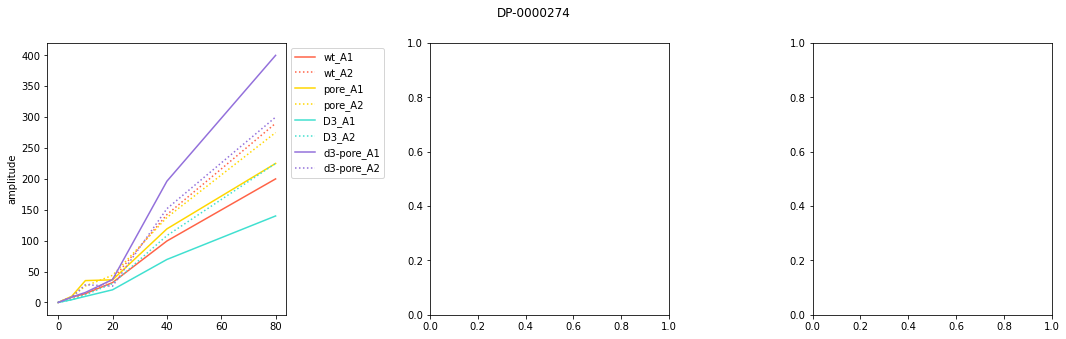

DP-0000275


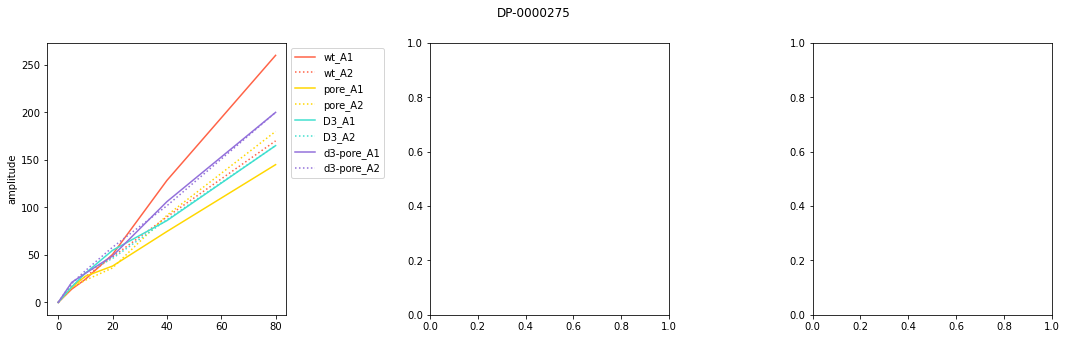

DP-0000352


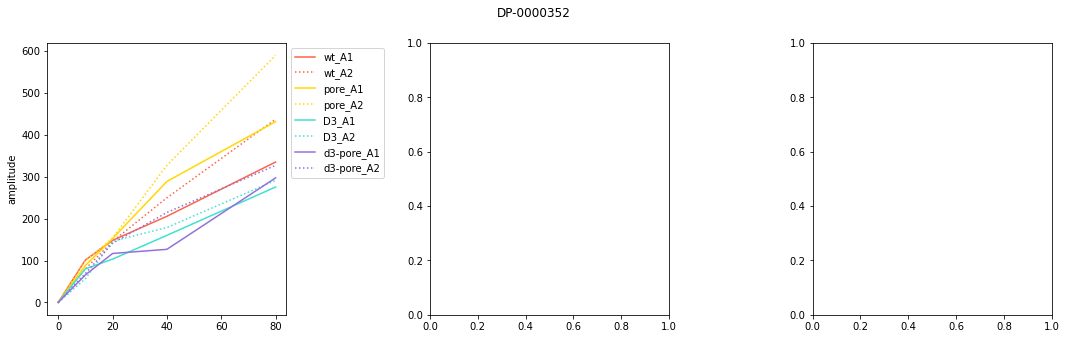

DP-0000375


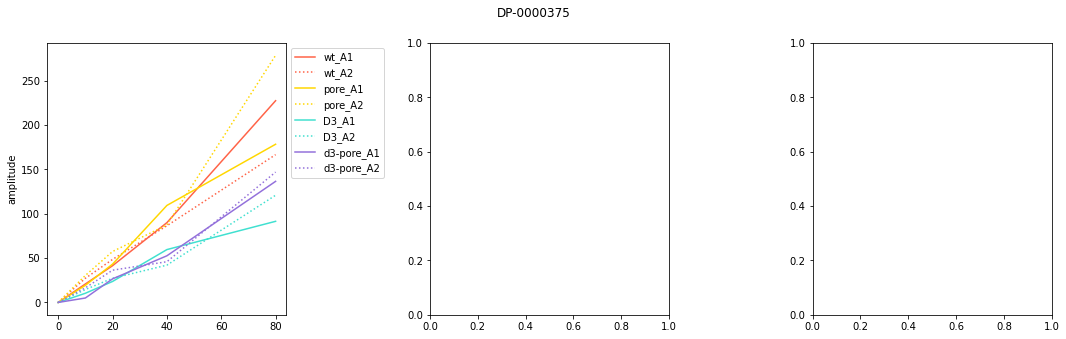

DP-0000481


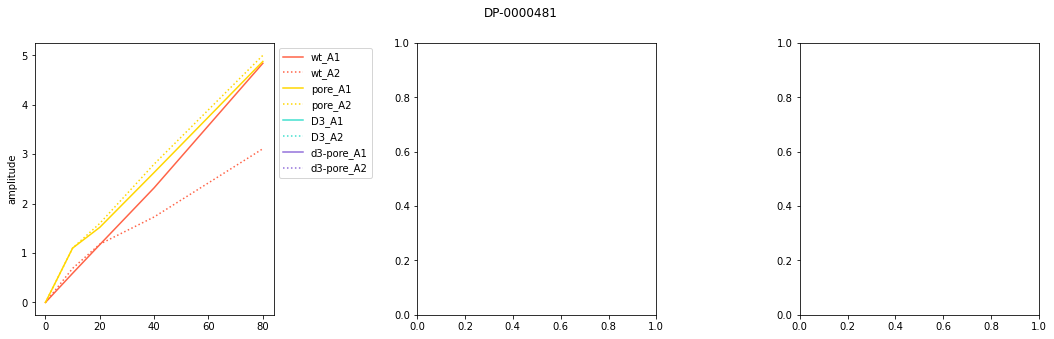

DP-0000485


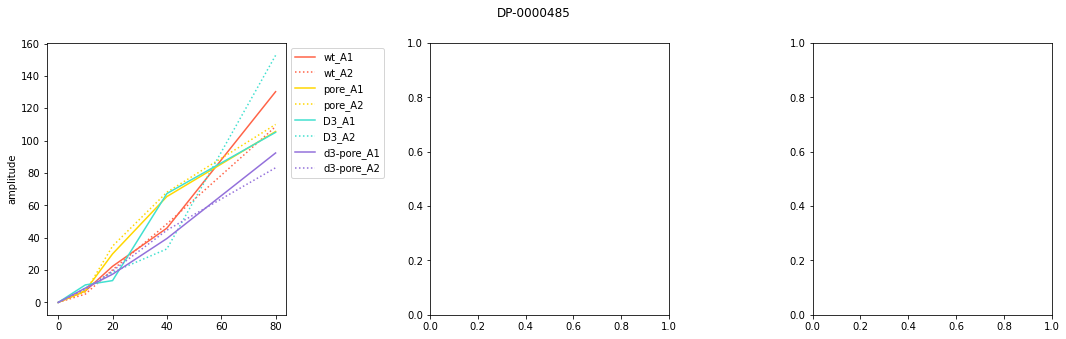

DP-0000490


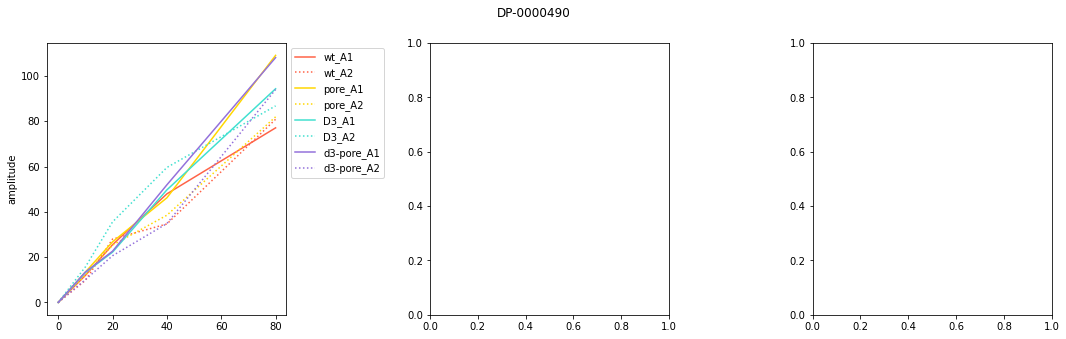

DP-0000492


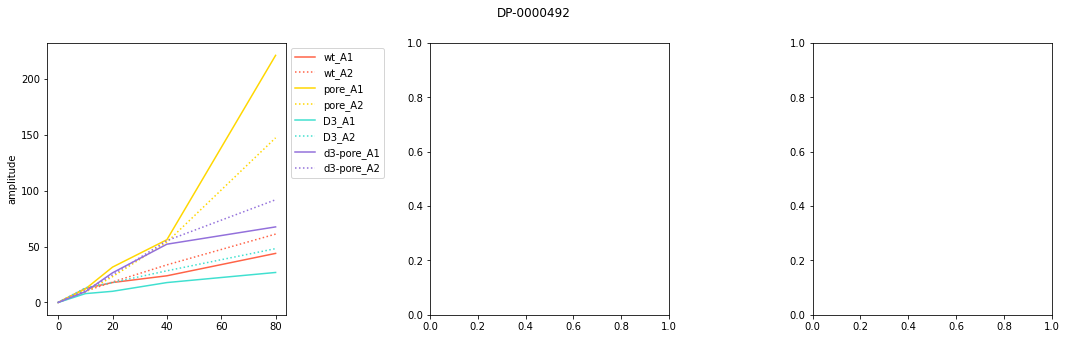

DP-0000498


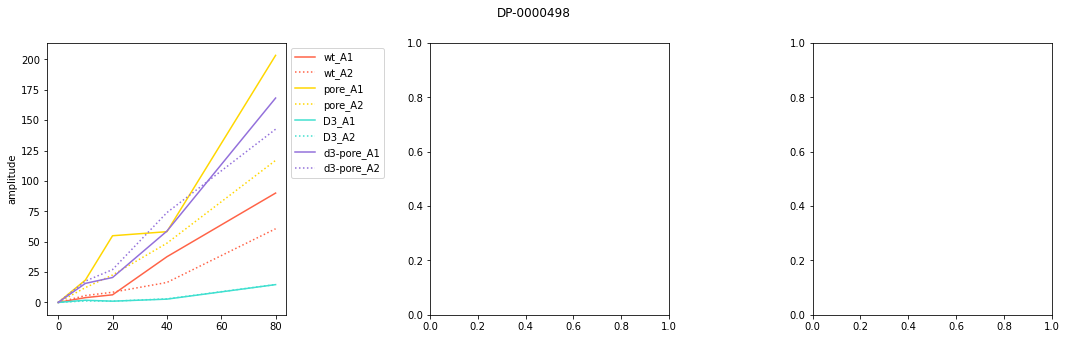

DP-0000499


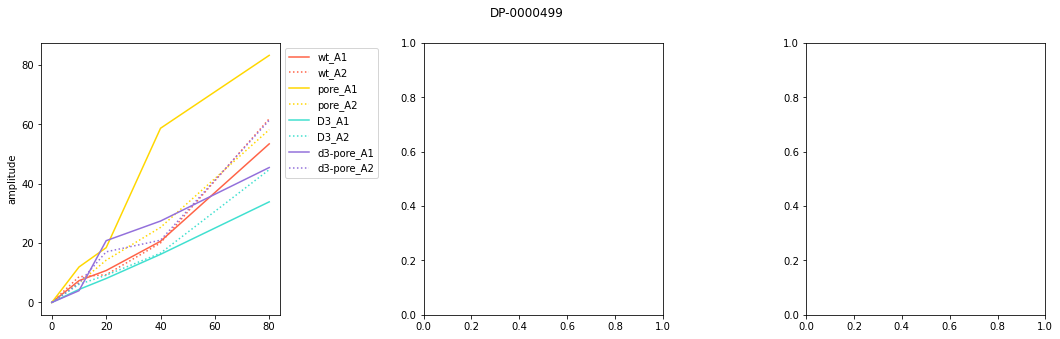

DP-0000548


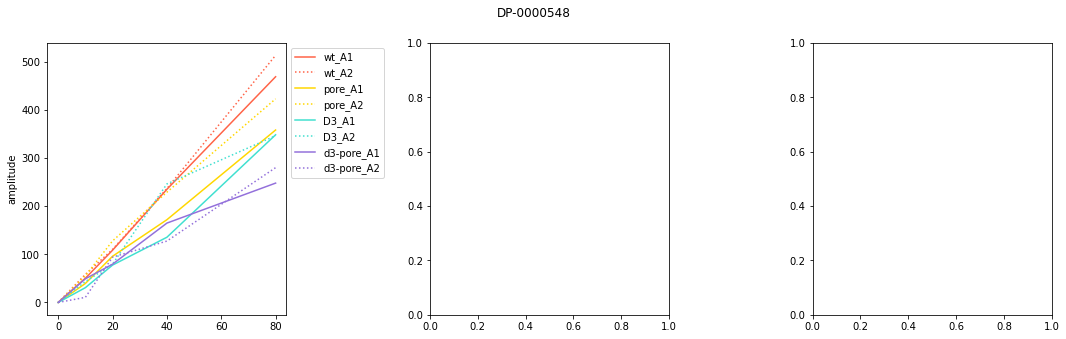

DP-0000551


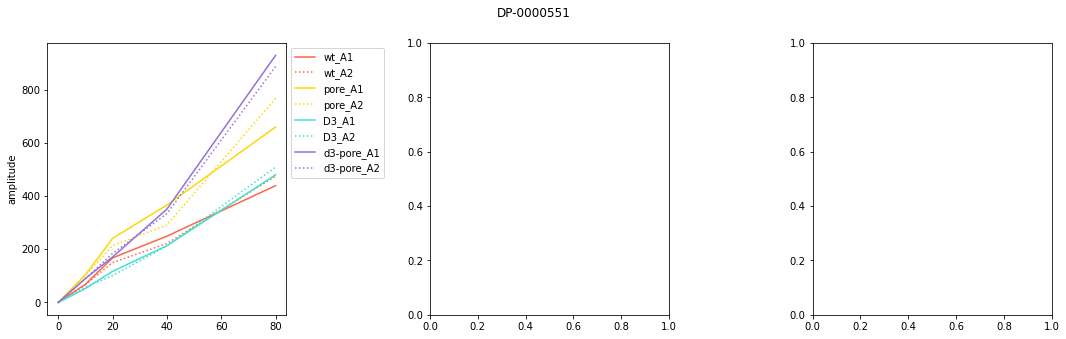

DP-0000552


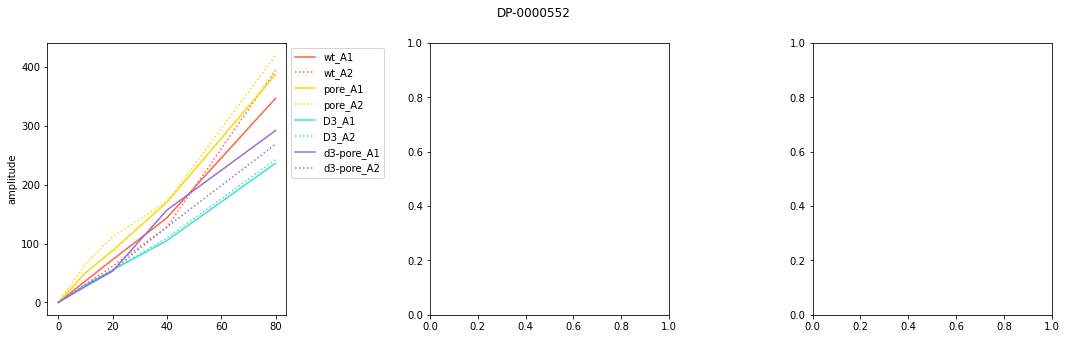

DP-0000553


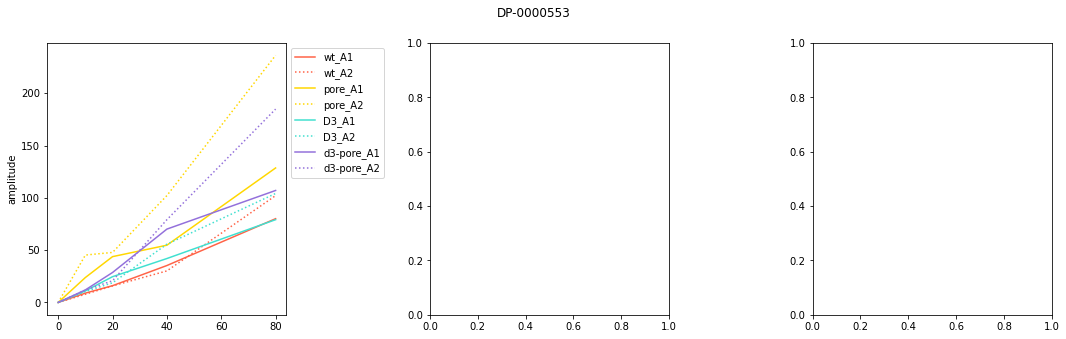

DP-0000555


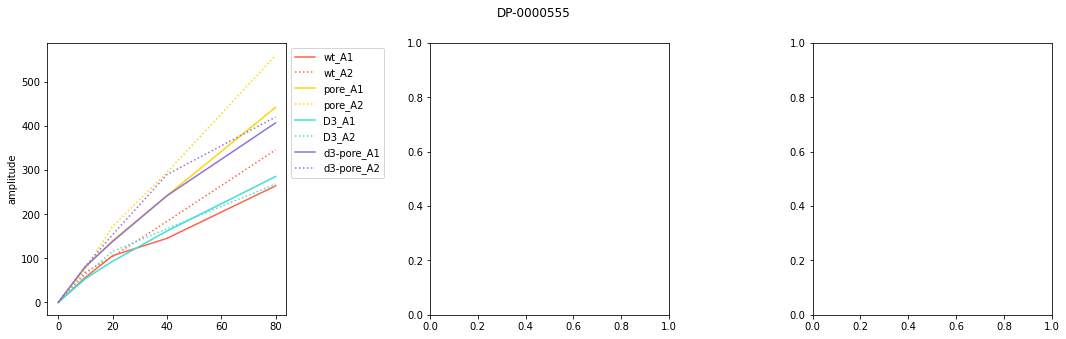

DP-0000556


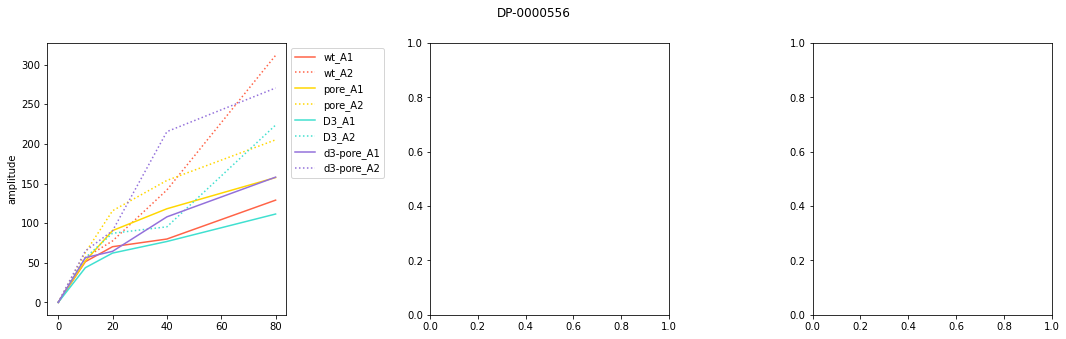

DP-0000558


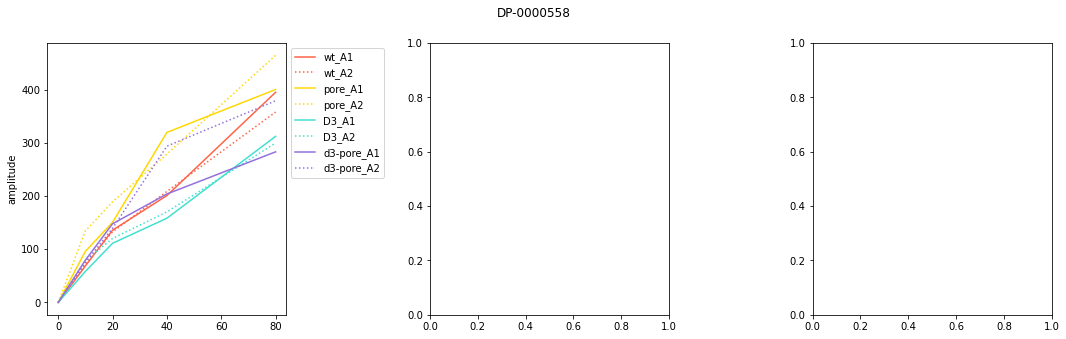

DP-0000559


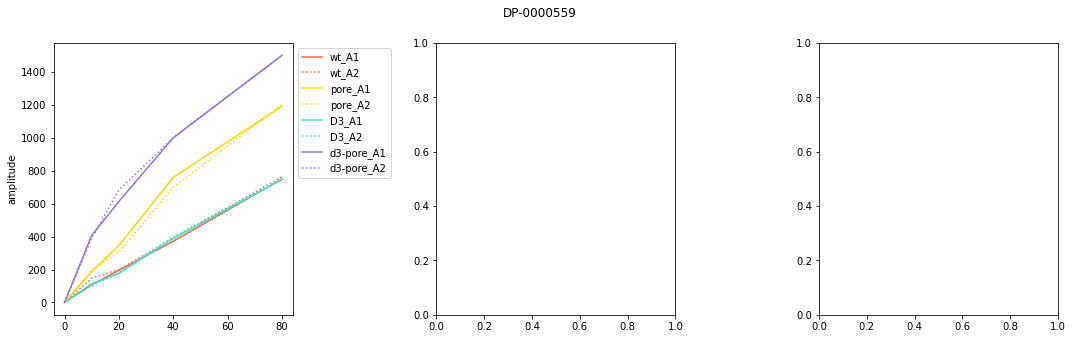

DP-0000560


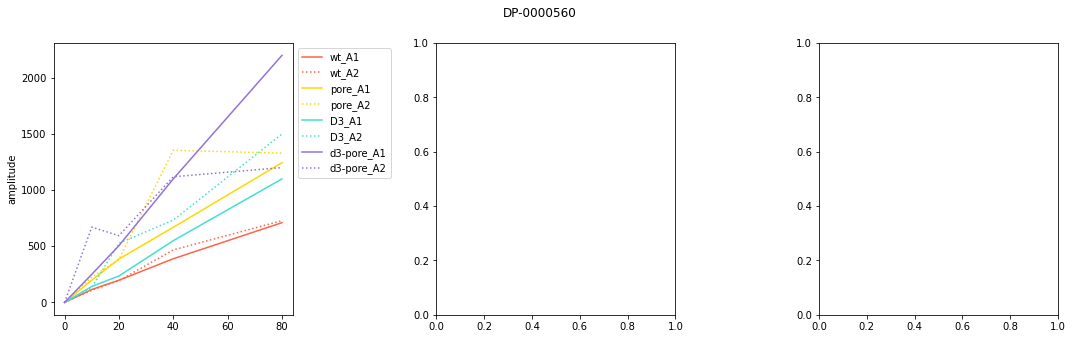

DP-0000562


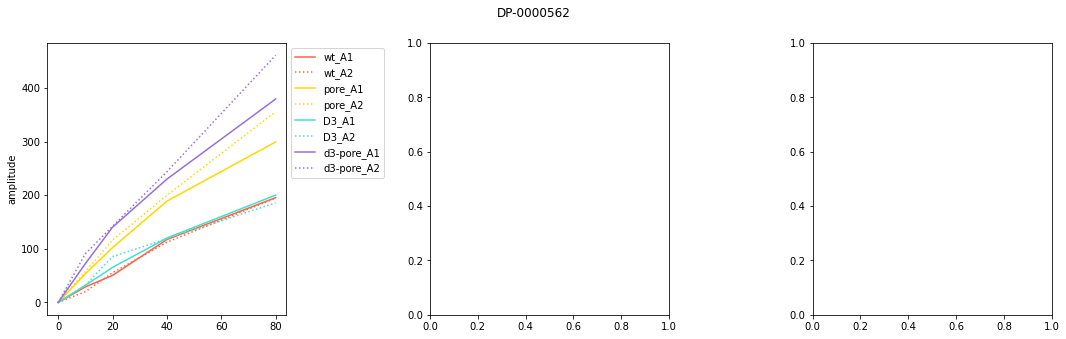

DP-0000563


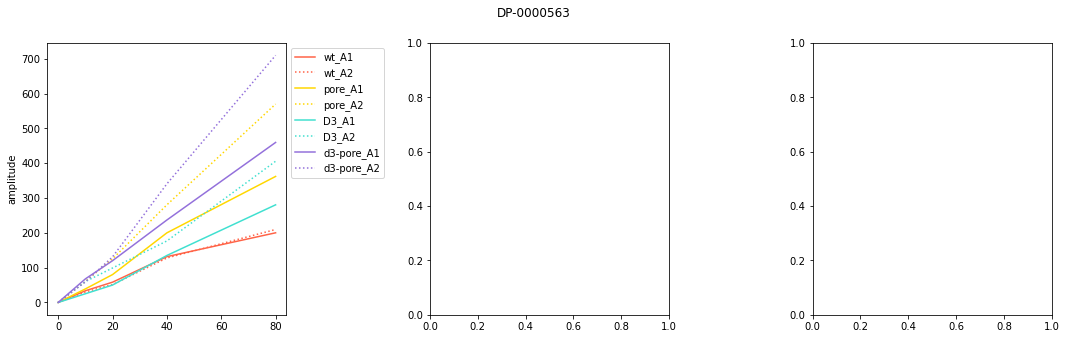

G210-2547


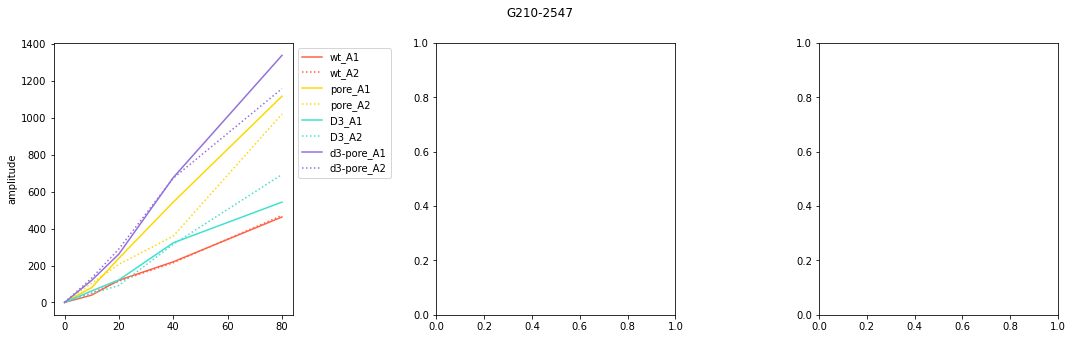

G414-0762


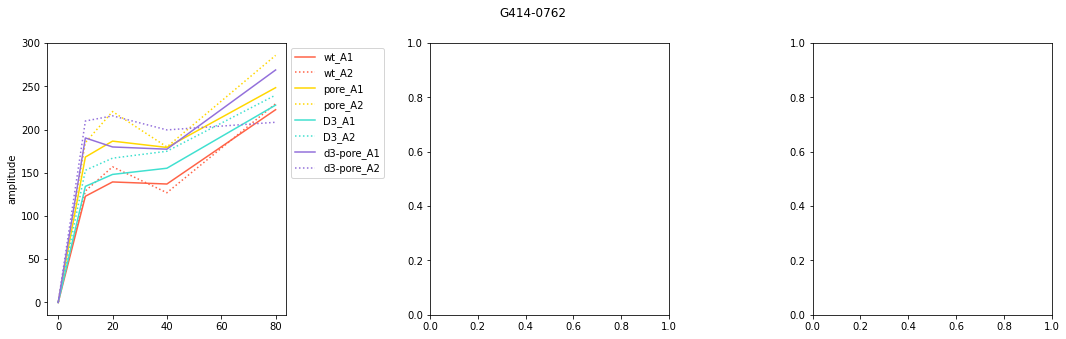

G414-0778


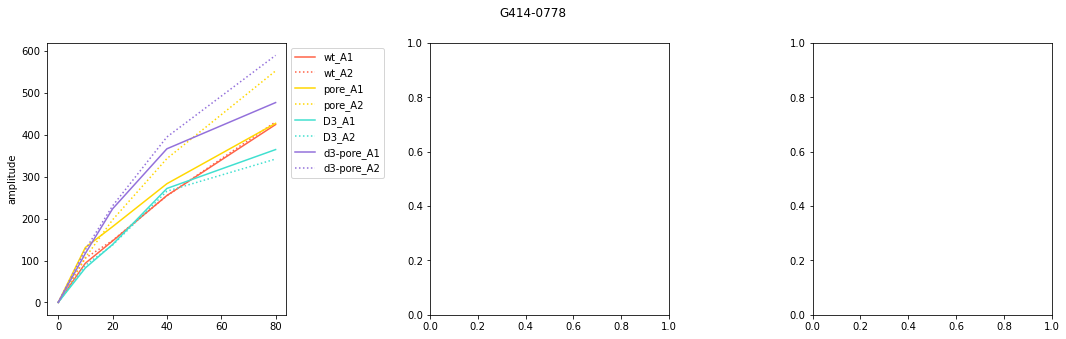

G414-1139


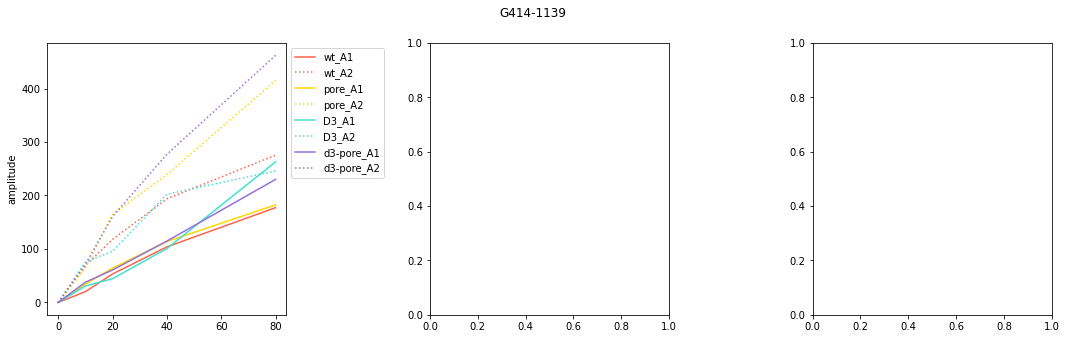

G414-1230


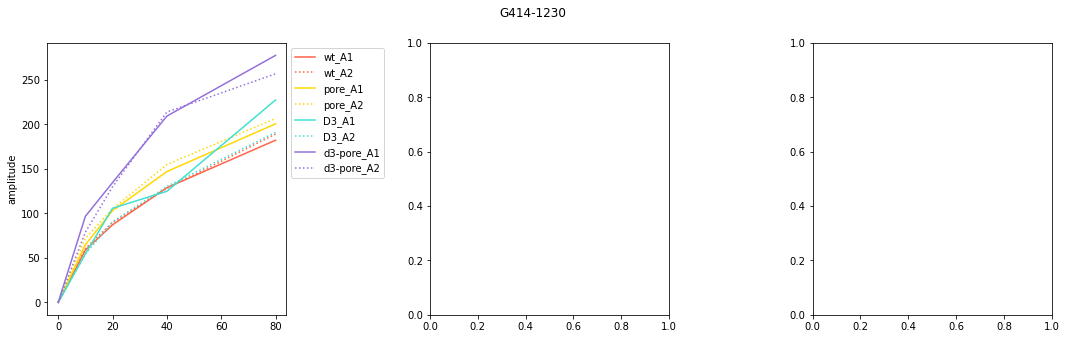

NSC_66754


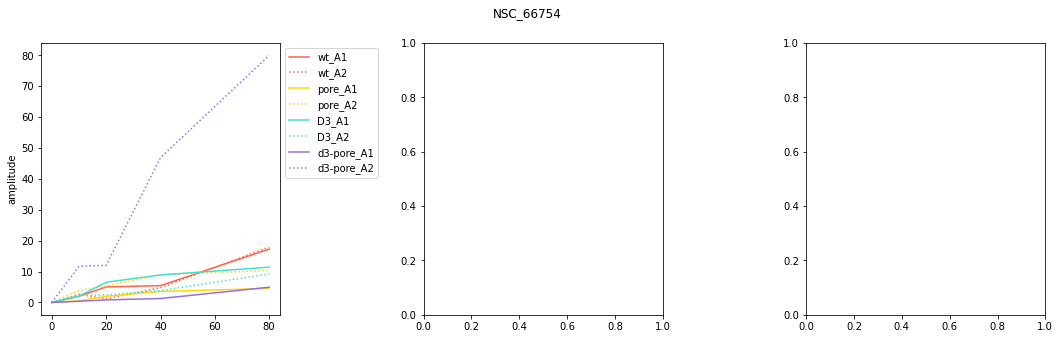

NSC_66761


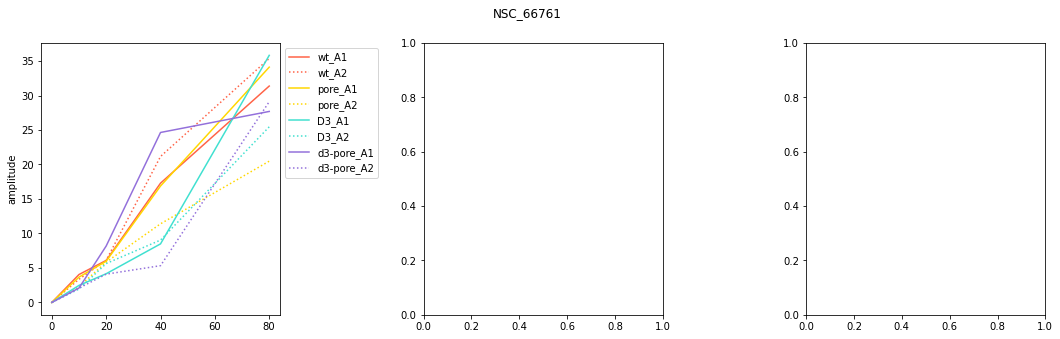

NSC_67729


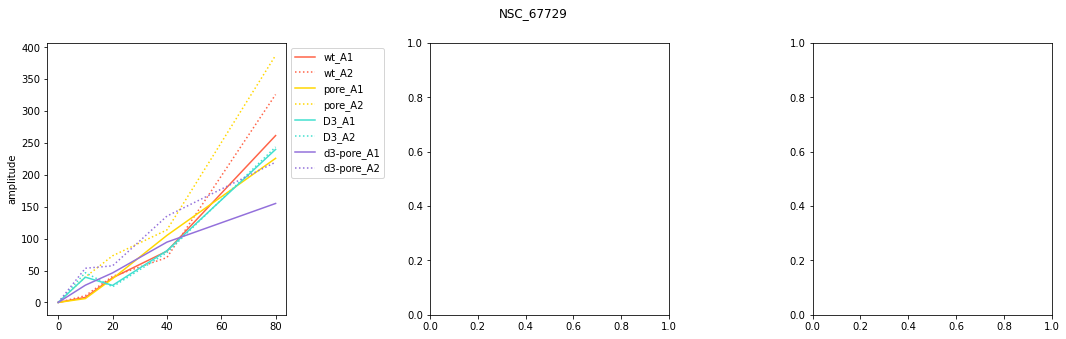

NSC_67735


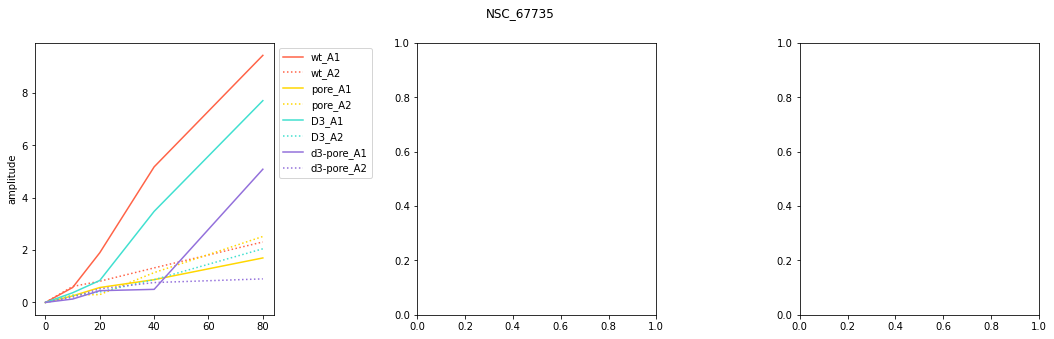

NSC_70687


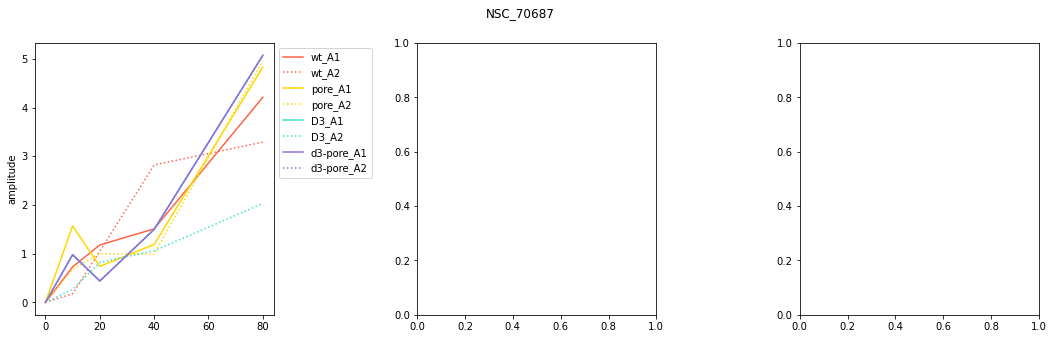

NSC_70691


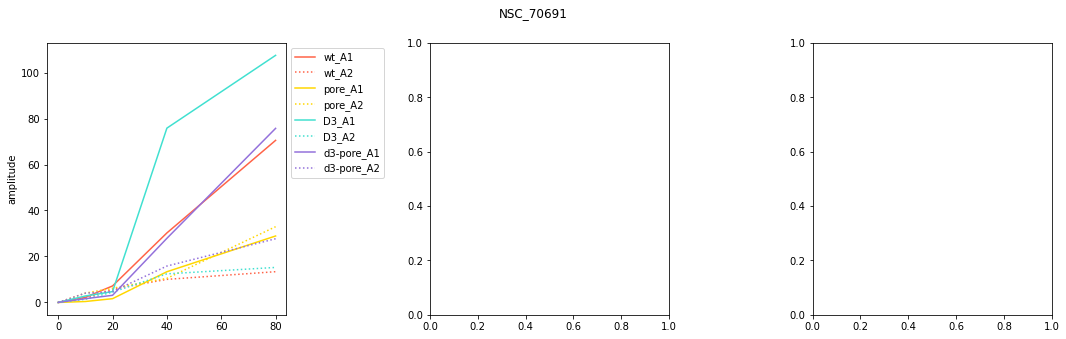

NSC_70695


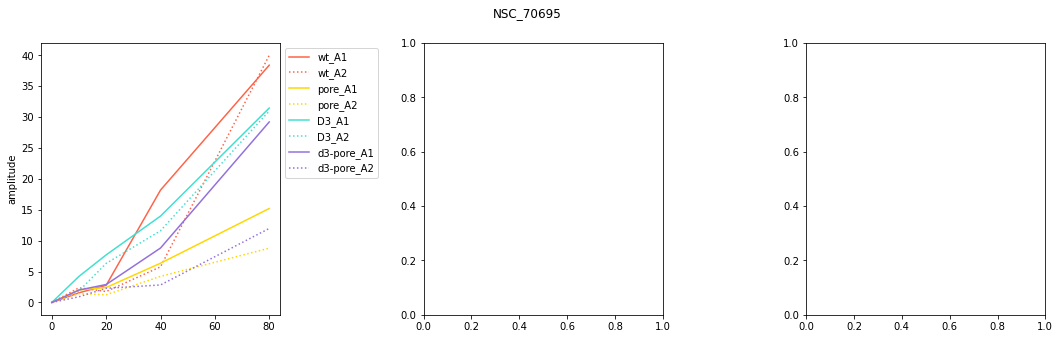

NSC_72381


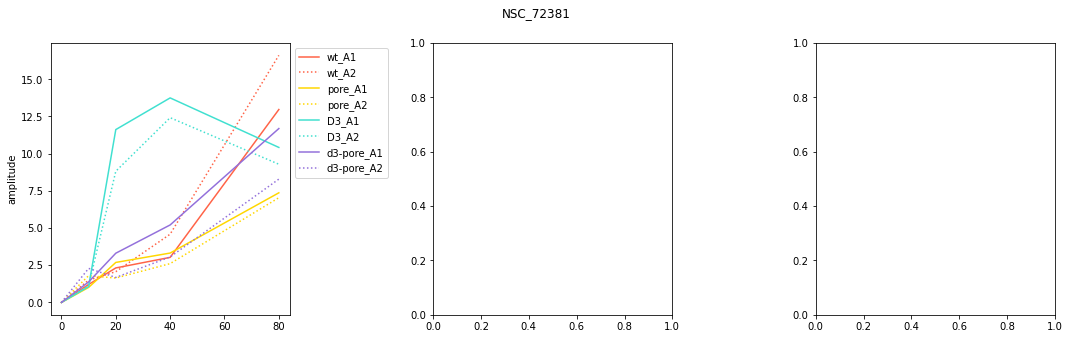

NSC_72382


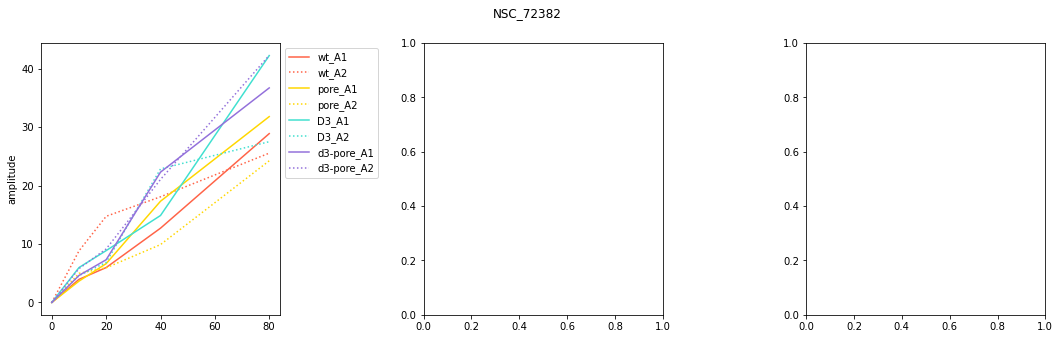

NSC_72564


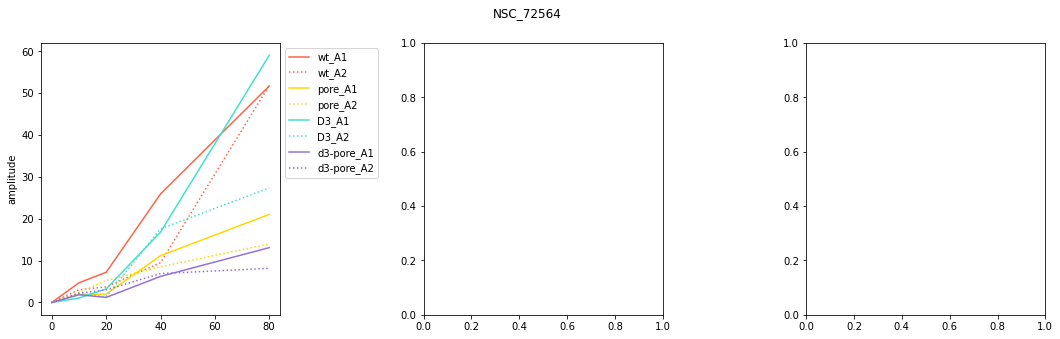

NSC_72586


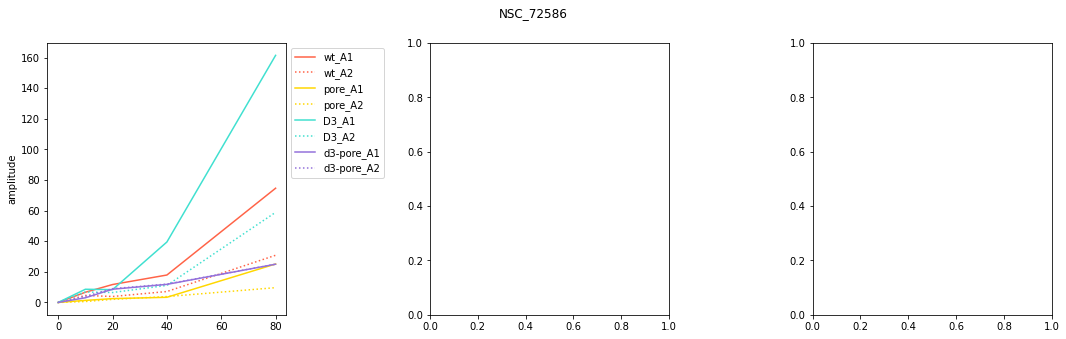

ST001786


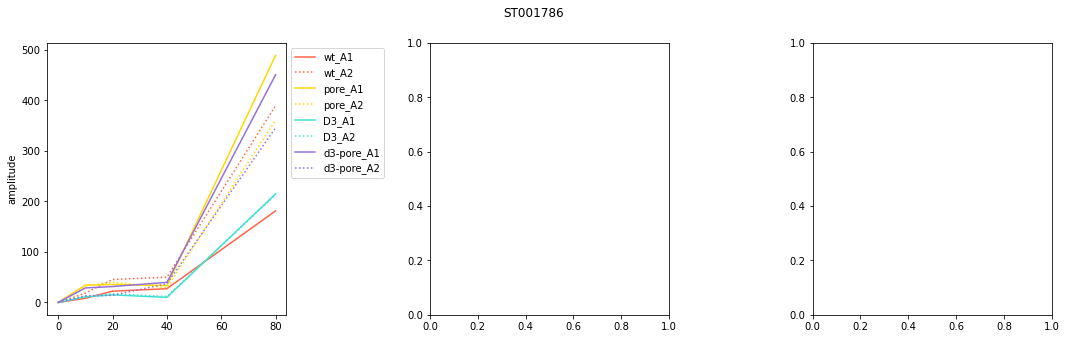

ST002653


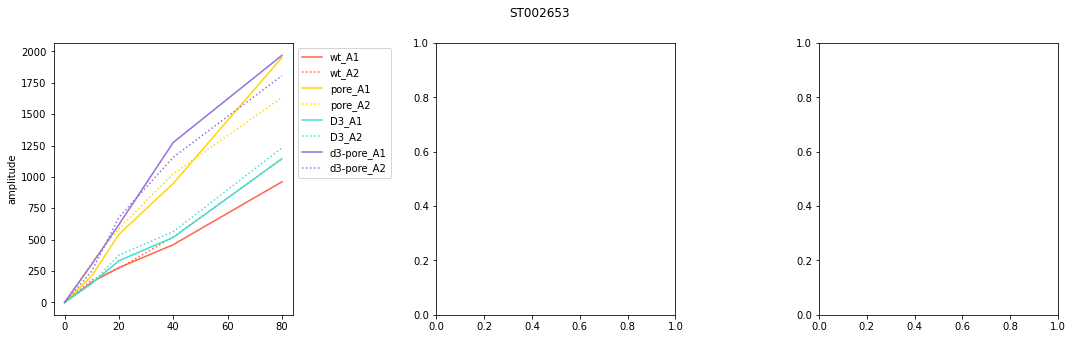

ST003326


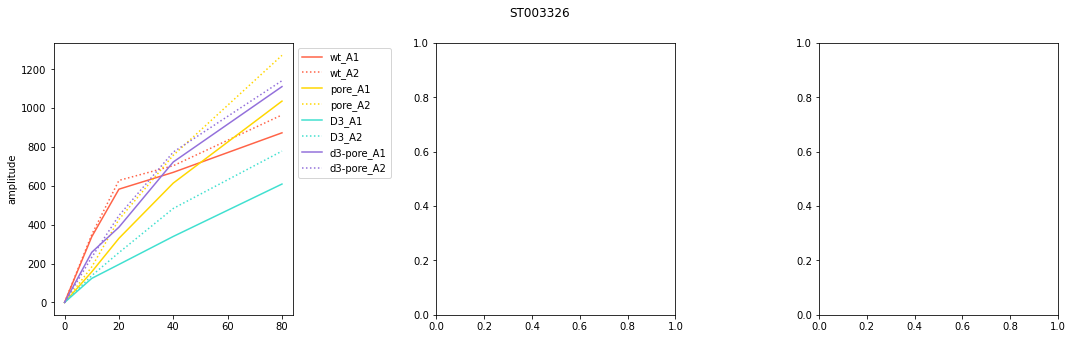

ST024061


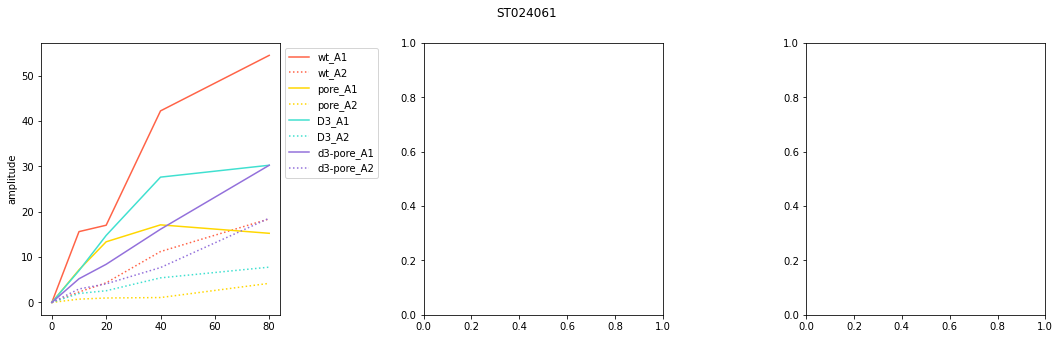

ST038872


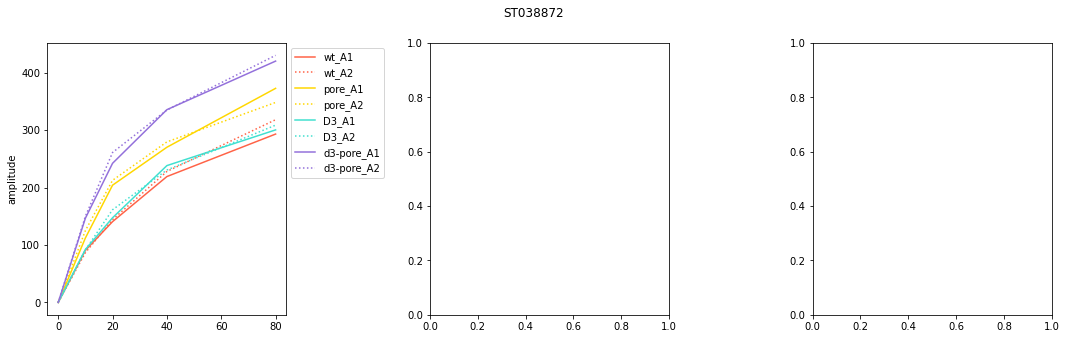

ST044917


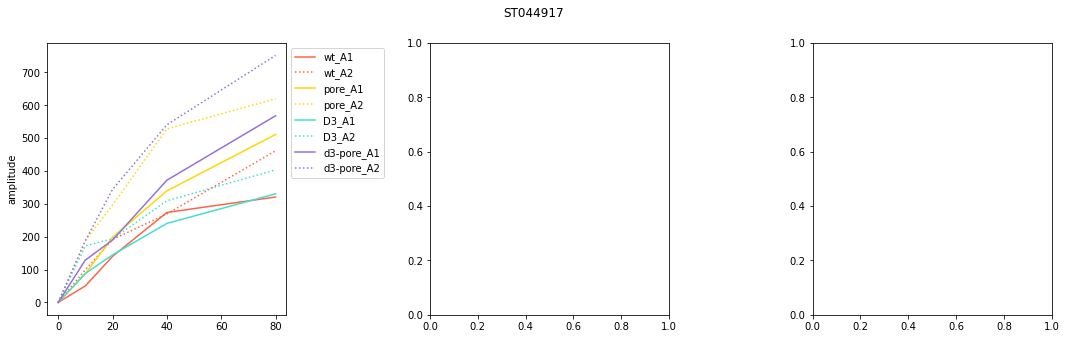

ST045207


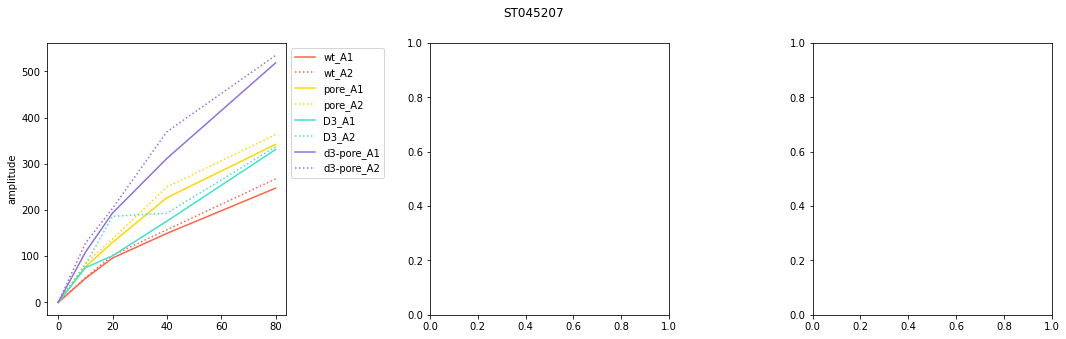

ST045323


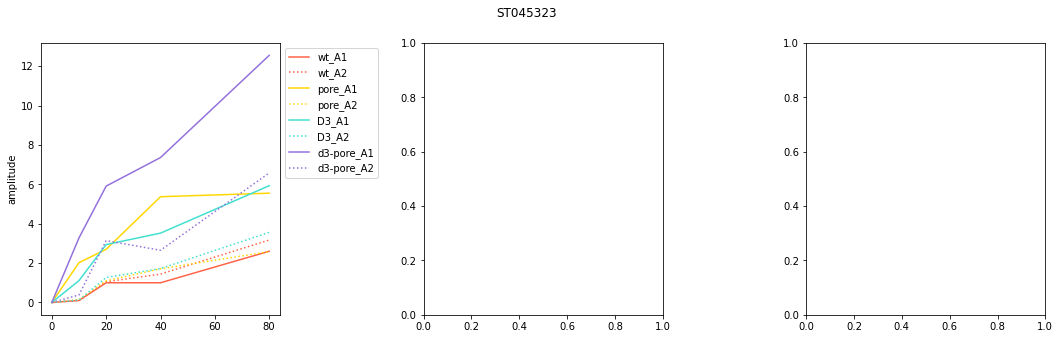

ST049791


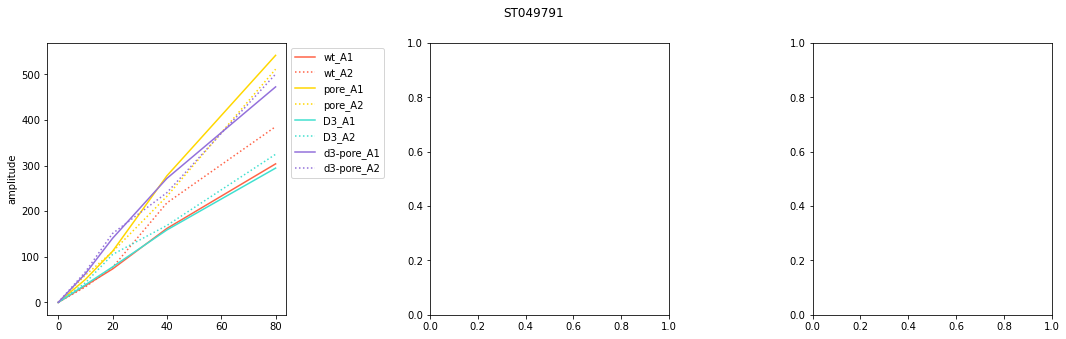

ST049792


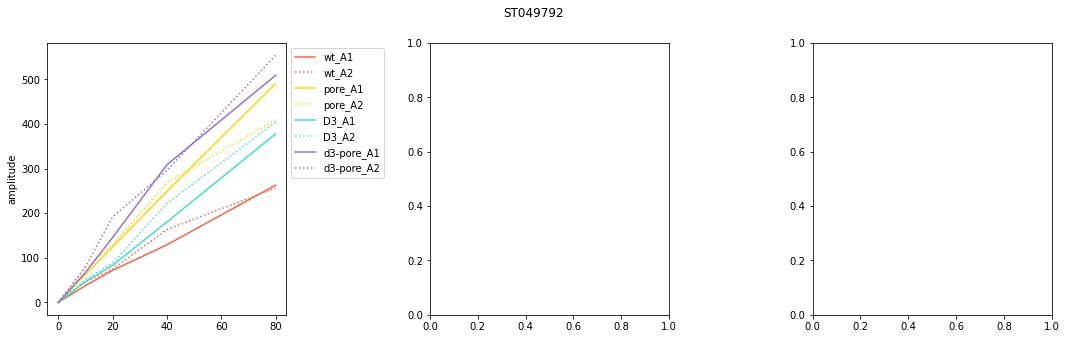

ST049942


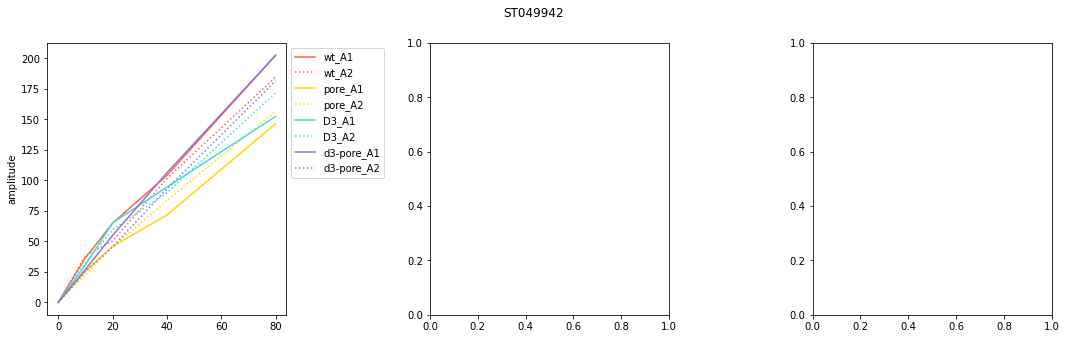

ST050757


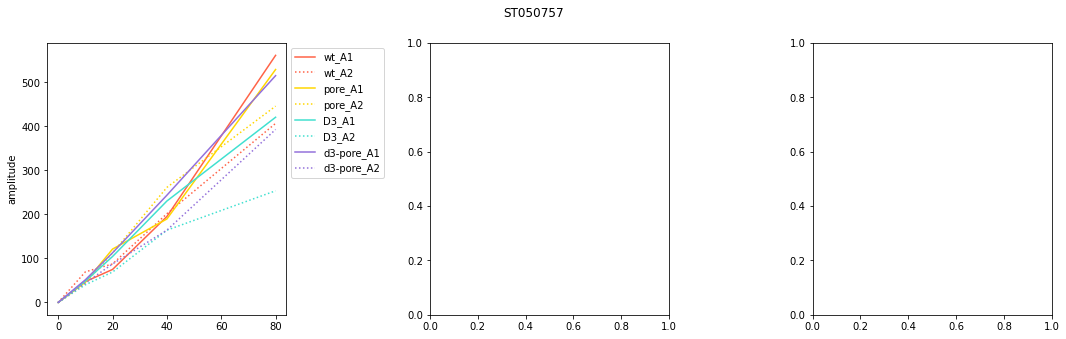

ST057111


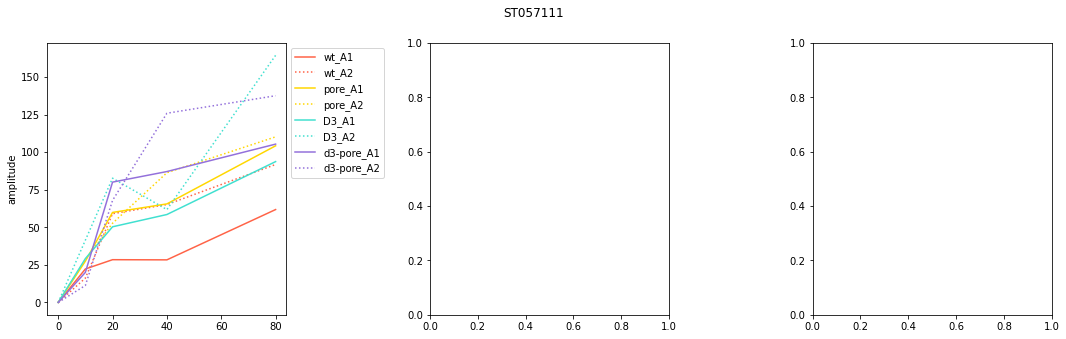

ST057338


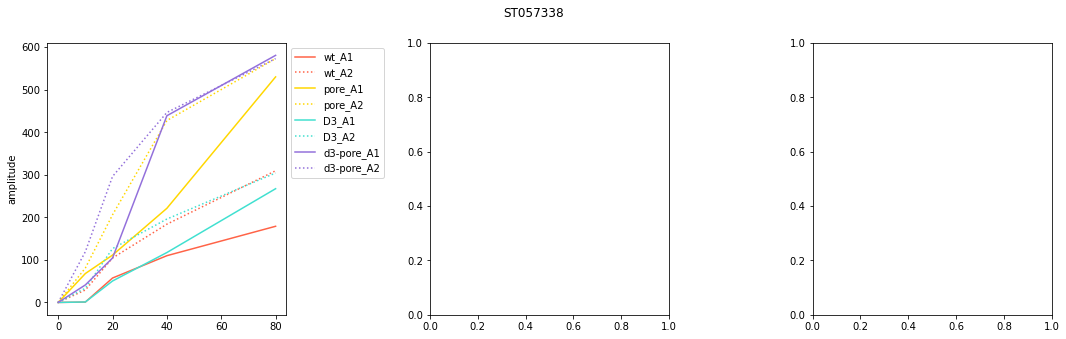

ST074710


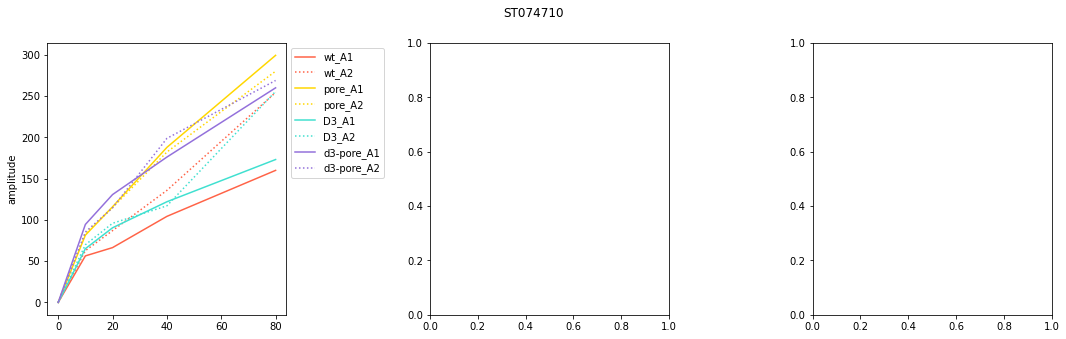

ST074716


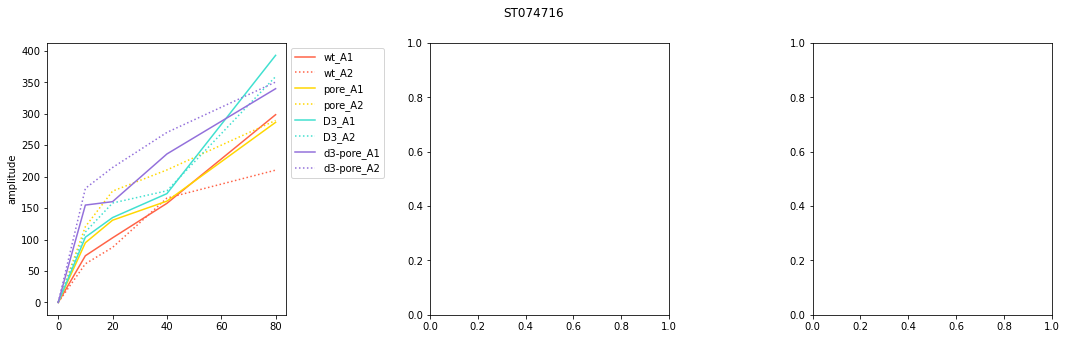

D724-0097


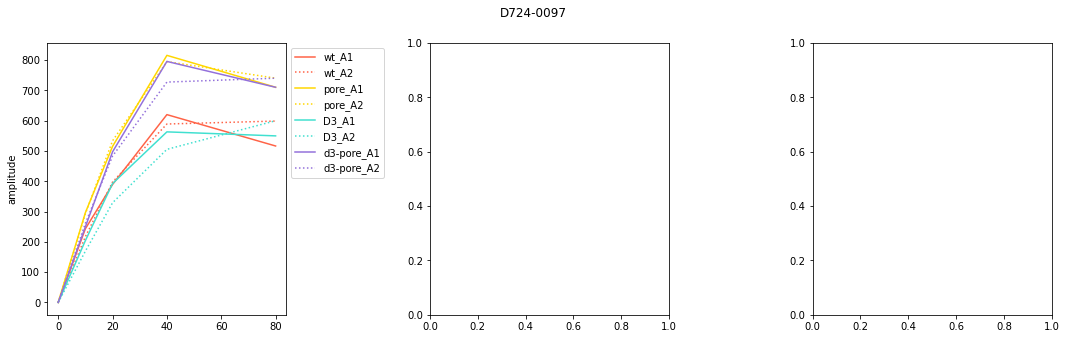

ciprofloxacin


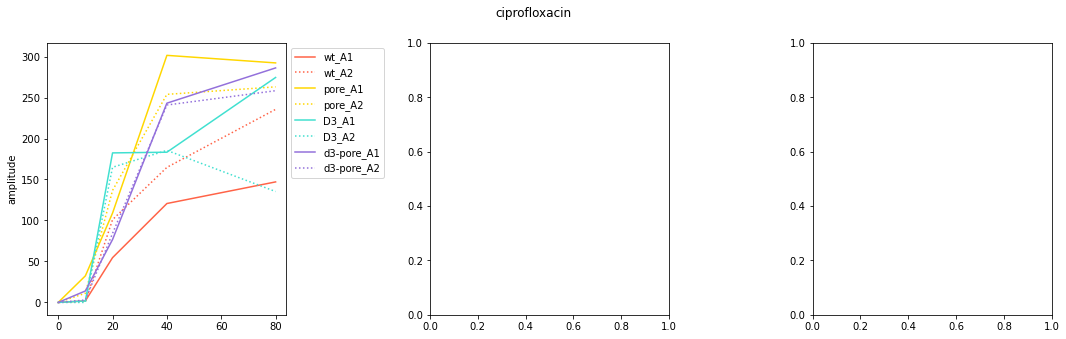

linezolid


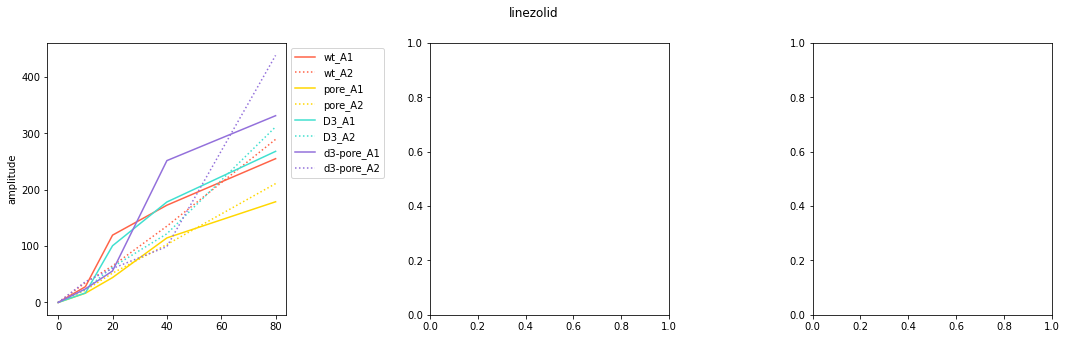

In [4]:
removed_mol = ["ASD007", "ASD012", "ASD019", "ASD021", "D372-0163"]
yy_label = ["wt_A1", "wt_A2", "pore_A1", "pore_A2", "D3_A1", "D3_A2", "d3-pore_A1", "d3-pore_A2"]
curve_color = ["tomato", "tomato", "gold", "gold", "turquoise", "turquoise", "mediumpurple", "mediumpurple"]
line_style = ['-', ":", '-', ":", '-', ":", '-', ":"]
slope_result = [] # slope and r2 of every amplitude curve
ratio_result = [] # ratio of slopes

for row, mol in zip(df_array, molnames):
    print(mol)
    # --- uptake curves ---
    Y1 = row[:5] # PAO1_A1
    Y2 = row[5:10] # PAO1_A2
    Yp1 = row[10:15] # pore_A1
    Yp2 = row[15:20] # pore_A2
    Yd1 = row[20:25] # pd3_A1
    Yd2 = row[25:30] # pd3_A2
    Ydp1 = row[30:35] # pd3pore_A1
    Ydp2 = row[35:] # pd3pore_A2
    fig, ax = plt.subplots(1,3, figsize=(18,5))
    plt.subplots_adjust(wspace=0.6)
    if mol in removed_mol:
        fig.suptitle(mol, color="red") # removed molecules are red
    else:
        fig.suptitle(mol)
    ListofY = [Y1, Y2, Yp1, Yp2, Yd1, Yd2, Ydp1, Ydp2]
    ListofSlope = [] # a row of slope_result
    for i in range(8):
        X = np.array([5,10,20,40,80]) # initialize X in every loop
        Y = ListofY[i]
        xx = X[~np.isnan(Y)]
        yy = Y[~np.isnan(Y)]
        xx = np.insert(xx, 0, 0) # add point (0,0)
        yy = np.insert(yy, 0, 0)
        ax[0].plot(xx, yy, color=curve_color[i], linestyle=line_style[i], label=yy_label[i])
        if len(yy) > 1:
            slope, r2 = CalcSlope(xx, yy) # fit curve, get slope
            ListofSlope.append(slope)
        else:
            ListofSlope.append(np.nan)

    slope_result.append(ListofSlope) # save slopes

    ax[0].set_ylabel("amplitude")
    ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
    
    # # --- slope ratios bar plot ---
    # bar_labels = ["A1", "A2"]
    
    # pw = [scale(ListofSlope[2]/ListofSlope[0]), scale(ListofSlope[3]/ListofSlope[1])]
    # dw = [scale(ListofSlope[4]/ListofSlope[0]), scale(ListofSlope[5]/ListofSlope[1])]
    # dpw = [scale(ListofSlope[6]/ListofSlope[0]), scale(ListofSlope[7]/ListofSlope[1])]
    # dpp = [scale(ListofSlope[6]/ListofSlope[2]), scale(ListofSlope[7]/ListofSlope[3])]
    # dpd = [scale(ListofSlope[6]/ListofSlope[4]), scale(ListofSlope[7]/ListofSlope[5])]
    
    # ratio_result.append(np.vstack((pw,dw,dpw,dpp,dpd)).flatten('F')) # save ratios

    # ax[1].bar([0, 6], pw, label="pore/wt", color="gold")
    # ax[1].bar([1, 7], dw, label="pd3/wt", color="turquoise")
    # ax[1].bar([2, 8], dpw, label="pd3-pore/wt", color="mediumpurple")
    # ax[1].bar([3, 9], dpp, label="pd3-pore/pore", color="mediumpurple", edgecolor='gold', hatch='///')
    # ax[1].bar([4, 10], dpd, label="pd3-pore/pd3", color="mediumpurple", edgecolor='turquoise', hatch='///')
    # ax[1].axhline(y=1, color='r', linestyle='--')
    # ax[1].axhline(y=1.5, color='r', linestyle='--')
    # ax[1].set_yticks([0,0.5,1,1.5,2,2.1,2.2,2.3,2.4])
    # ax[1].set_ylim(0,2.5)
    # ax[1].set_yticklabels(["0","0.5","1","1.5","2","5","8","11","14"])

    # ax[1].set_xticks([2, 8])
    # ax[1].set_xticklabels(bar_labels)
    # ax[1].set_ylabel("ratio")
    # ax[1].legend(bbox_to_anchor=(-0.6, 0), loc="lower left")

    # # --- molecule picture ---

    # img = mpimg.imread(f'mol_pic/{mol}.png')
    # ax[2].imshow(img)

    plt.show()

In [13]:
slope_df = pd.DataFrame()
slope_df['molecule'] = molnames
slope_df[yy_label] = slope_result
slope_df.to_csv("recalc_slopes.csv")

# ratio_header = ["A1_pore/wt","A1_pd3/wt","A1_pd3-pore/wt","A1_pd3-pore/pore","A1_pd3-pore/pd3","A2_pore/wt","A2_pd3/wt","A2_pd3-pore/wt","A2_pd3-pore/pore","A2_pd3-pore/pd3"]

# ratio_df = pd.DataFrame()
# ratio_df['molecule'] = molnames
# ratio_df[ratio_header] = ratio_result
# ratio_df.to_csv("recalc_slope_ratios.csv")

In [14]:
from sklearn.linear_model import LinearRegression
X1 = np.array([5,10,20,40,80])
print("molecule", "slope", "r2")

for row, mol in zip(df_array, molnames):
    Y1 = row[1:6] # A1
    X = X1[~np.isnan(Y1)]
    Y = Y1[~np.isnan(Y1)]
    X = X.reshape(-1,1)
    reg = LinearRegression(fit_intercept=False).fit(X, Y)
    print(mol, np.round(reg.coef_[0],3), np.round(reg.score(X,Y),3))

molecule slope r2
1500272 0.876 0.877
1501007 1.153 0.993
1501150 2.931 0.517
1503100 10.335 0.993
1503243 8.064 0.996
1504185 3.592 0.894
1505604 11.139 0.938
1505622 24.683 0.995
1506043 3.925 0.938
2300173 3.803 0.867
2300307 7.757 0.761
ASD001 8.919 0.995
ASD002 20.94 0.998
ASD004 10.838 0.993
ASD007 34.241 0.973
ASD012 3.581 0.86
ASD019 2.302 0.973
ASD021 30.663 0.996
D300-0069 4.726 0.985
D300-0109 10.259 0.889
D372-0004 4.086 0.916
D372-0005 8.349 0.988
D372-0044 3.463 0.842
D372-0163 2.611 -4.583
D389-0855 3.938 0.994
D389-0970 6.189 0.883
DP-0000267 1.953 0.981
DP-0000268 1.461 0.994
DP-0000271 1.413 0.983
DP-0000273 0.2 0.916
DP-0000274 2.441 0.984
DP-0000275 3.198 0.994
DP-0000352 4.586 0.748
DP-0000375 2.685 0.975
DP-0000481 0.06 0.999
DP-0000485 1.503 0.953
DP-0000490 1.025 0.959
DP-0000492 0.582 0.84
DP-0000498 1.044 0.935
DP-0000499 0.634 0.974
DP-0000548 5.837 0.999
DP-0000551 5.782 0.951
DP-0000552 4.156 0.98
DP-0000553 0.968 0.99
DP-0000555 3.491 0.914
DP-0000556 1.81